# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Brain Stroke Analysis & Prediction</p>

<p style="text-align:center; ">
<img src="https://www.sinakhan.com/media/photos/BrainAneurysm.jpg" style='width: 350px; height: 350px;'>
<B>Brain Stroke</B>   


<a id="1"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

<a id="2"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About Dataset</p>

* **id:** Unique identifier
* **gender:** Gender of the patient (Male, Female, Other)
* **age:** Age of the patient
* **hypertension:** **0** if the patient doesn't have hypertension, **1** if the patient has hypertension
* **heart_disease:** **0** if the patient doesn't have any heart diseases, **1** if the patient has a heart disease
* **ever_married:** **Yes** if the patient is married, **No** if the patient is not married 
* **work_type:** Profession of the patient (children, Govt_job, Never_worked, Private, Self-employed)
* **Residence_type:** Residence category of the patient (Rural, Urban)
* **avg_glucose_level:** Average glucose level in blood of the patient
* **bmi:** Body Mass Index of the patient
* **smoking_status:** Smoking status of the patient (formerly smoked, never smoked, smokes, Unknown). **Unknown** in **smoking_status** means that the information is unavailable for this patient
* **stroke:** **1** if the patient had a stroke or **0** if not


In [3]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

<a id="3"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Basic Exploration</p>


**Let's have a glimpse of the dataset.**

In [4]:
print(f"Shape Of The Dataset : {data.shape}")
print(f"\nGlimpse Of The Dataset :")
data.head().style.set_properties(**{"background-color": "#ADD8E6","color":"#432C0A","border": "1.5px #432C0A"})

Shape Of The Dataset : (5110, 12)

Glimpse Of The Dataset :


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000000,0,1,Yes,Private,Urban,228.690000,36.600000,formerly smoked,1
1,51676,Female,61.000000,0,0,Yes,Self-employed,Rural,202.210000,nan,never smoked,1
2,31112,Male,80.000000,0,1,Yes,Private,Rural,105.920000,32.500000,never smoked,1
3,60182,Female,49.000000,0,0,Yes,Private,Urban,171.230000,34.400000,smokes,1
4,1665,Female,79.000000,1,0,Yes,Self-employed,Rural,174.120000,24.000000,never smoked,1


In [5]:
print(f"Informations Of The Dataset :\n")
print(data.info())

Informations Of The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


<a id="4"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Summary</p>

In [6]:
print(f"Summary Of The Dataset :")
data.describe().style.set_properties(**{"background-color": "#ADD8E6","color":"#432C0A","border": "1.5px #432C0A"})

Summary Of The Dataset :


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#ADD8E6","color":"#432C0A","border": "1.5px #432C0A"})

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


In [8]:
dup = data[data.duplicated()].shape[0]
print(f"There is {dup} duplicate entry among {data.shape[0]} entries in this dataset.")

data.drop_duplicates(keep='first',inplace=True)
print(f"After removing duplicate entries there are {data.shape[0]} entries in this dataset.")

There is 0 duplicate entry among 5110 entries in this dataset.
After removing duplicate entries there are 5110 entries in this dataset.


In [9]:
print(f"Null values of the Dataset :")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#ADD8E6","color":"#432C0A","border": "1.5px #432C0A"})

Null values of the Dataset :


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,0,0,0,0,0,0,0,201,0,0


**Insights:**

* There are missing values in **bmi**. We will drop the rows that have missing bmi values.
* There is no duplicate values in this dataset.
* We will encode the categorical features into numerical form later.

<a id="5"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Preprocessing</p>

In [10]:
data.dropna(axis = 0, inplace = True)
print(f"After dropping null values, the shape of the Dataset is {data.shape}")
print(f"After dropping null values, null values of the Dataset :")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#ADD8E6","color":"#432C0A","border": "1.5px #432C0A"})

After dropping null values, the shape of the Dataset is (4909, 12)
After dropping null values, null values of the Dataset :


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
data["age"] = data["age"].astype("int")
data = data[data["gender"] != "Other"]
data["hypertension"].replace({0:"No", 1:"Yes"}, inplace = True)
data["heart_disease"].replace({0:"No", 1:"Yes"}, inplace = True)
data["stroke"].replace({0:"No", 1:"Yes"}, inplace = True)
data["ever_married"].replace({"No":"Unmarried", "Yes":"Married"}, inplace = True)
data["work_type"].replace({"Self-employed":"Self Employed","children":"Children", "Govt_job":"Government Job", "Private":"Private Job", "Never_worked":"Unemployed"}, inplace = True)
data["smoking_status"].replace({"never smoked":"Never Smoked","formerly smoked":"Formerly Smoked", "smokes":"Smokes"}, inplace = True)
data.rename(columns={"gender": "Gender","age": "Age","hypertension":"Hypertension","heart_disease":"Heart Disease","ever_married":"Marital Status","work_type":"Occupation Type","Residence_type":"Residence Type","avg_glucose_level": "Average Glucose Level","bmi":"BMI","smoking_status":"Smoking Status","stroke":"Stroke"}, inplace = True)
data = data[["Age","Gender","Marital Status","BMI","Occupation Type","Residence Type","Smoking Status","Hypertension","Heart Disease","Average Glucose Level","Stroke"]]

print("After preprocessing, let's have a glimpse of the final dataset :")
data.head().style.set_properties(**{"background-color": "#ADD8E6","color":"#432C0A","border": "1.5px #432C0A"})

KeyError: ignored

In [ ]:
print(f"After preprocessing, let's have a look on the summary of the dataset :")
data.describe().T.style.set_properties(**{"background-color": "#ADD8E6","color":"#432C0A","border": "1.5px #432C0A"})

After preprocessing, let's have a look on the summary of the dataset :


,count,mean,std,min,25%,50%,75%,max
Age,4908.000000,42.857579,22.577004,0.000000,25.000000,44.000000,60.000000,82.000000
BMI,4908.000000,28.894560,7.854320,10.300000,23.500000,28.100000,33.100000,97.600000
Average Glucose Level,4908.000000,105.297402,44.425550,55.120000,77.067500,91.680000,113.495000,271.740000


In [ ]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#ADD8E6","color":"#432C0A","border": "1.5px #432C0A"})

,count,unique,top,freq
Gender,4908,2,Female,2897
Marital Status,4908,2,Married,3204
Occupation Type,4908,5,Private Job,2810
Residence Type,4908,2,Urban,2490
Smoking Status,4908,4,Never Smoked,1852
Hypertension,4908,2,No,4457
Heart Disease,4908,2,No,4665
Stroke,4908,2,No,4699


<a id="6"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Custom Palette For Visualization</p>

In [85]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#ADD8E6","figure.facecolor":"#ADD8E6","grid.color":"white"})
sns.set_context("poster",font_scale = .7)

# palette = ["#432C0A","#f7941d","#6c9a76","#f25a29","#cc4b57"]
palette = ["#77b5fe","#fbcce7","#ADD8E6","#ADD8E6","#ADD8E6"]
palette1 = ["#00008b","#cc0000","#228b22","#cba135","#ADD8E6"]
palette_cmap = ["#77b5fe","#fbcce7","#c9ffe5","#d0f0c0","#fffacd"]
#palette_cmap = ["#6c9a76","#cc4b57","#764a23","#f25a29","#f7941d"]

# sns.palplot(sns.color_palette(palette))
# sns.palplot(sns.color_palette(palette_cmap))
# plt.show()

<a id="7"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's Age</p>

Let's have a look on the distribution of stroke patient's age :


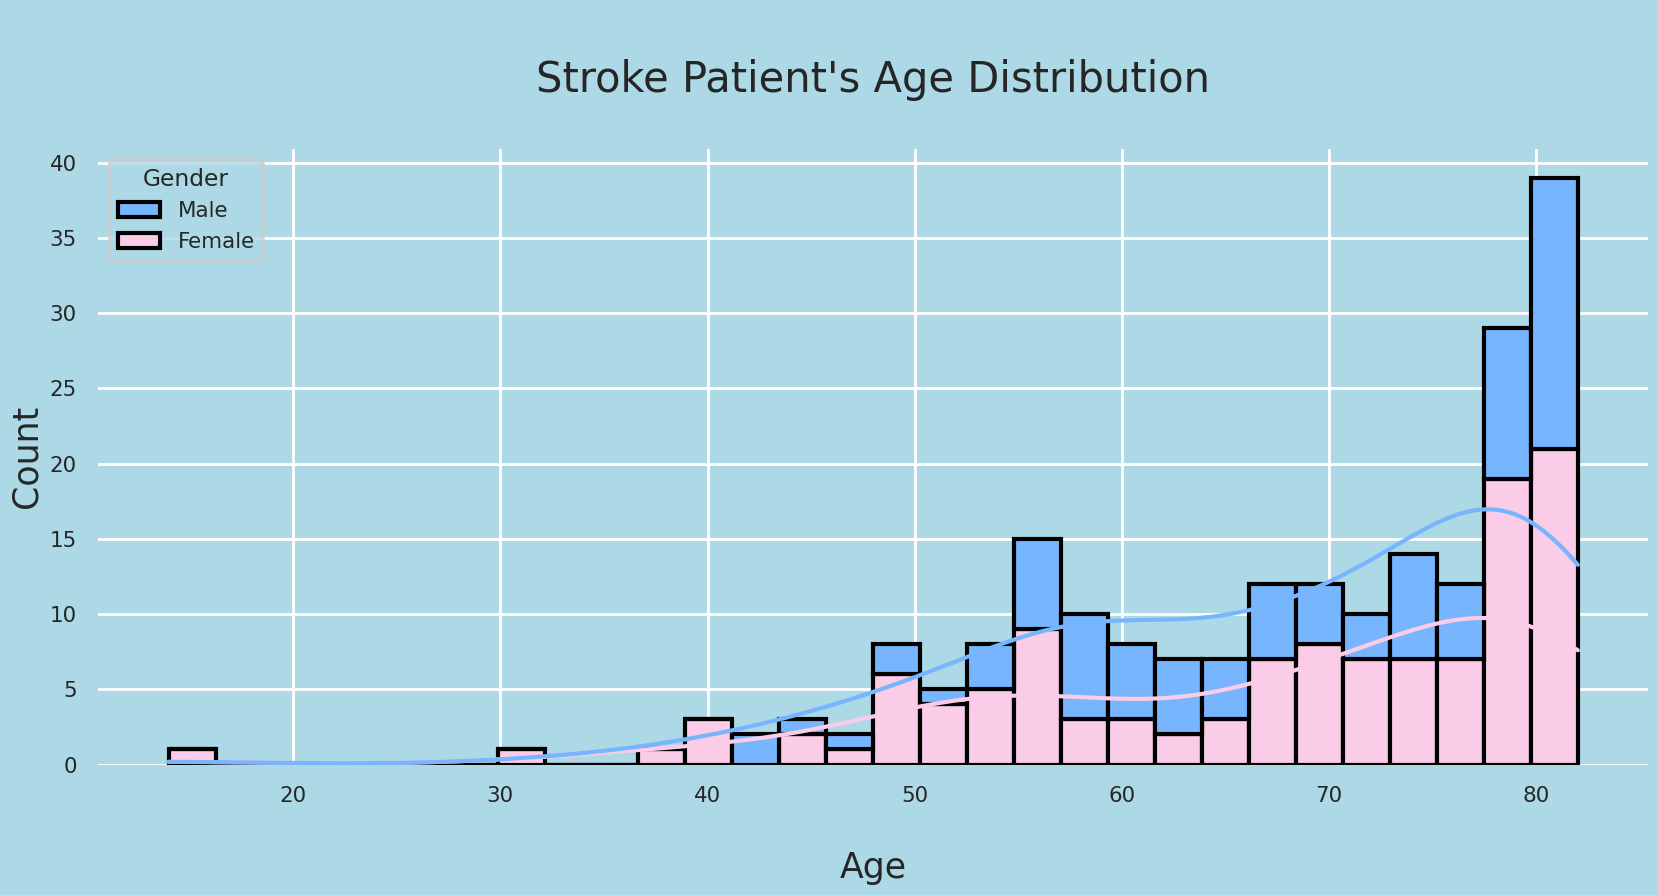

In [46]:
print(f"Let's have a look on the distribution of stroke patient's age :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=data[data["Stroke"] == "Yes"],x="Age",hue="Gender",multiple="stack",palette=palette[0:2],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color(palette[1])
p.axes.lines[1].set_color(palette[0])
p.axes.set_title("\nStroke Patient's Age Distribution\n",fontsize=30)
p.set_ylabel("Count",fontsize=25)
p.set_xlabel("\nAge",fontsize=25)
p.set_yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

**Insights:**

* We can see the stroke patient's age distribution is left skewed. Most of the patients  fall in between **60 years** to **82 years**.
* Also there are some young and children female stroke patients too.

Let's have a look on the distribution of genderwise stroke patient's age :


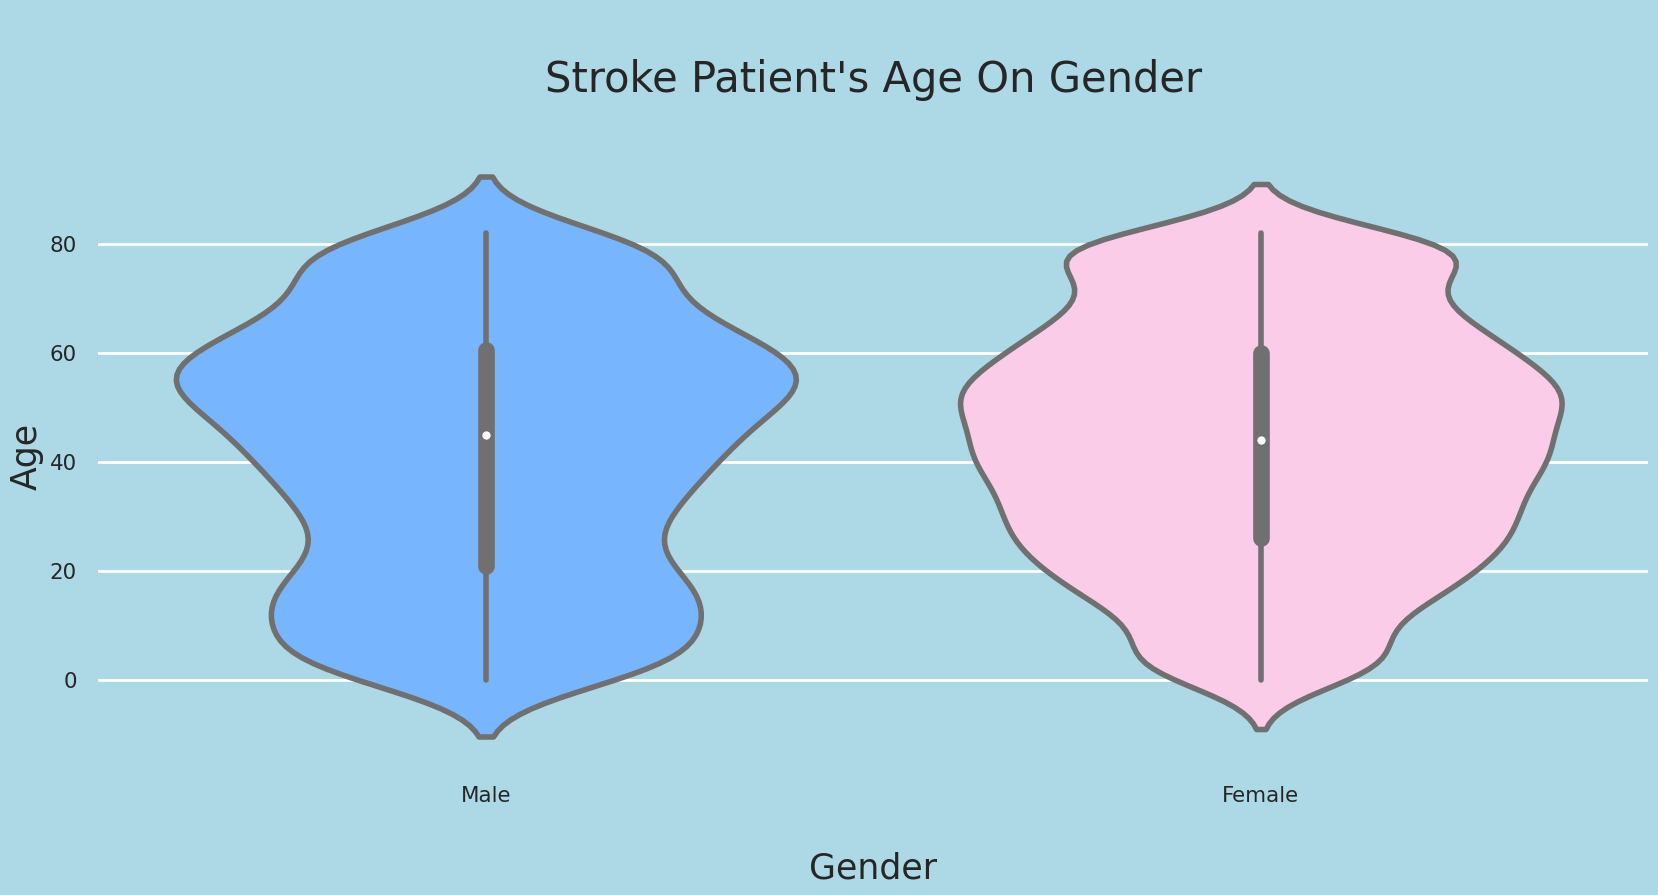

In [47]:
print("Let's have a look on the distribution of genderwise stroke patient's age :")
plt.subplots(figsize=(20, 8))

p=sns.violinplot(data=data[data["Stroke"] == "Yes"],x=data["Gender"],y=data["Age"],order=data["Gender"].value_counts(ascending=True).index,palette=palette[0:2],saturation=1,linewidth=4,edgecolor="black")
p.axes.set_title("\nStroke Patient's Age On Gender\n",fontsize=30)
p.axes.set_xlabel("\nGender",fontsize=25)
p.axes.set_ylabel("Age",fontsize=25)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the **Male** patients fall in between **55 years** to **82 years**
* Most of the **Female** patients fall in between **48 years** to **82 years**


<a id="8"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's Gender</p>

Let's have a look on the ratio of stroke patient's gender :


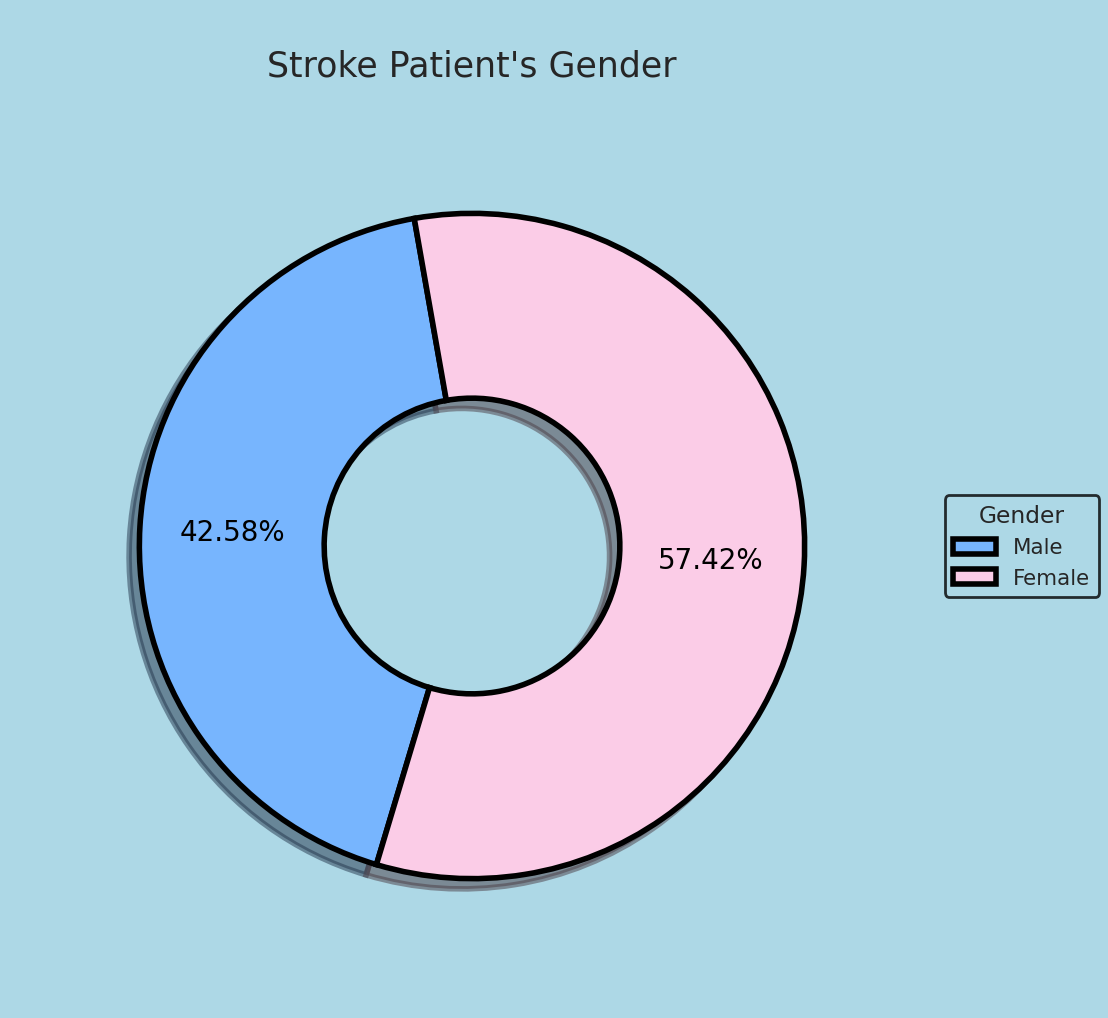

In [49]:
print(f"Let's have a look on the ratio of stroke patient's gender :")
plt.subplots(figsize=(12, 12))

labels = "Male","Female"
size = 0.5

wedges, texts, autotexts = plt.pie([data[data["Stroke"] == "Yes"]["Gender"].value_counts(ascending=True).values[0],
                                    data[data["Stroke"] == "Yes"]["Gender"].value_counts(ascending=True).values[1]],
                                    explode = (0,0),
                                    textprops=dict(size= 20, color= "black"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = palette[0:2], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 100)

plt.legend(wedges, labels, title="Gender",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Gender",fontsize=25)
plt.show()

Let's have a look on the stroke patient's gender :


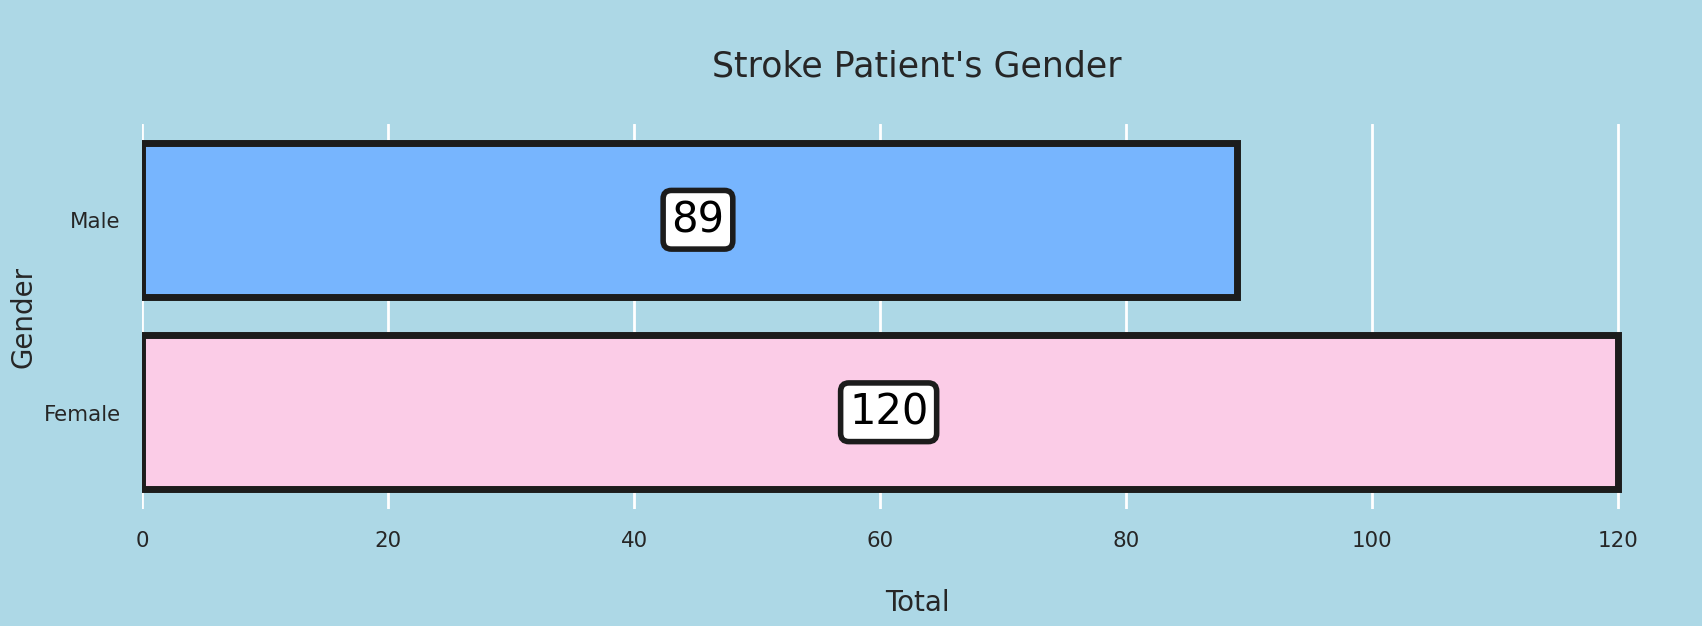

In [51]:
print("Let's have a look on the stroke patient's gender :")
plt.subplots(figsize=(20, 5))
p=sns.countplot(y=data[data["Stroke"]=="Yes"]["Gender"],order=data[data["Stroke"]=="Yes"]["Gender"].value_counts(ascending=True).index,palette=palette[0:2], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nStroke Patient's Gender\n",fontsize=25)
p.axes.set_ylabel("Gender",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the stroke patients are **Female** with a ratio of **57.42%** followed by **Male** with a ratio of **42.58%**


<a id="9"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's Smoking Status</p>

Let's have a look on the ratio of stroke patient's smoking status :


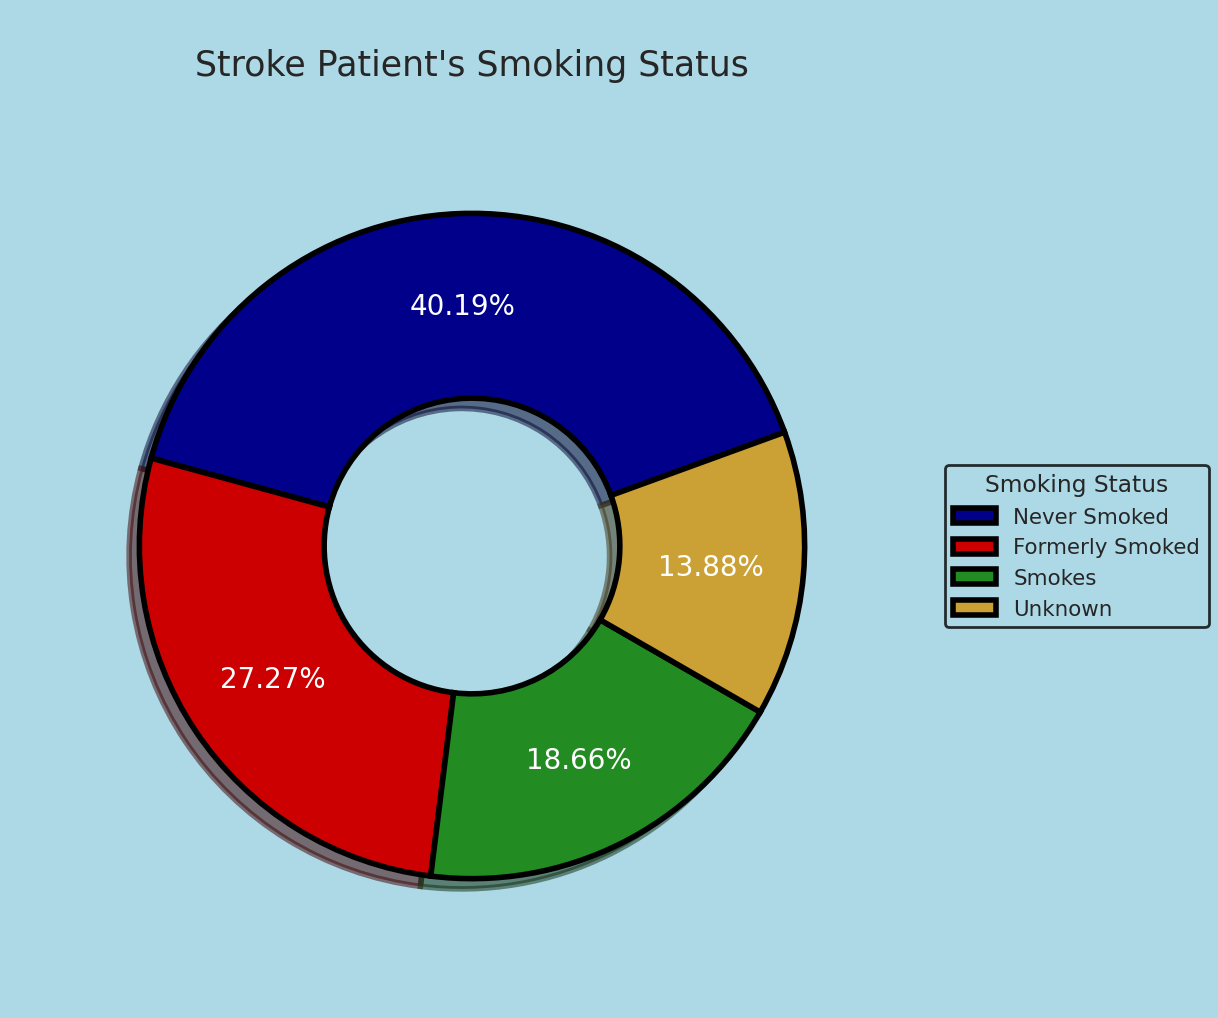

In [56]:
print(f"Let's have a look on the ratio of stroke patient's smoking status :")
plt.subplots(figsize=(12, 12))

labels = "Never Smoked","Formerly Smoked","Smokes","Unknown"
size = 0.5

wedges, texts, autotexts = plt.pie([data[data["Stroke"] == "Yes"]["Smoking Status"].value_counts(ascending=False).values[0],
                                    data[data["Stroke"] == "Yes"]["Smoking Status"].value_counts(ascending=False).values[1],
                                    data[data["Stroke"] == "Yes"]["Smoking Status"].value_counts(ascending=False).values[2],
                                    data[data["Stroke"] == "Yes"]["Smoking Status"].value_counts(ascending=False).values[3]],
                                    explode = (0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = palette1[0:4], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 20)

plt.legend(wedges, labels, title="Smoking Status",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Smoking Status",fontsize=25)
plt.show()

Let's have a look on the stroke patient's smoking status :


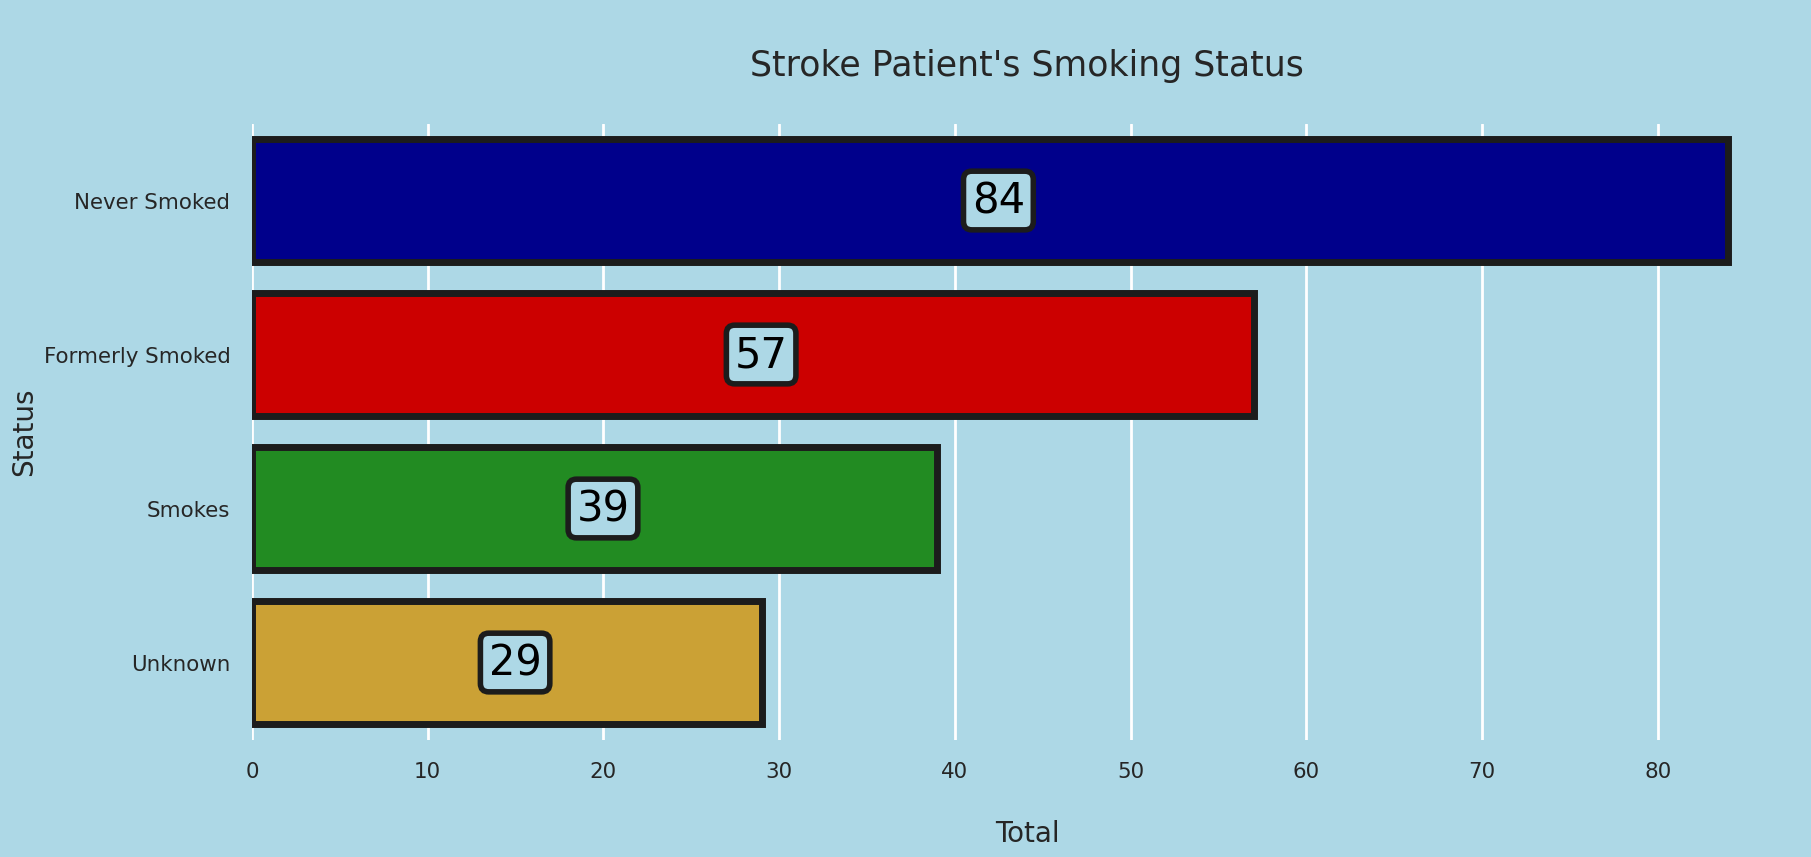

In [59]:
print("Let's have a look on the stroke patient's smoking status :")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=data[data["Stroke"]=="Yes"]["Smoking Status"],order=data[data["Stroke"]=="Yes"]["Smoking Status"].value_counts(ascending=False).index,palette=palette1[0:4], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nStroke Patient's Smoking Status\n",fontsize=25)
p.axes.set_ylabel("Status",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#ADD8E6", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the stroke patients have **Never Smoked** with a ratio of **40.19%**
* Some of the stroke patients have **Smoked Previuosly** with a ratio of **27.27%**
* For some patients, the smoking status is unknown 

<a id="10"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's Marital Status</p>

Let's have a look on the ratio of stroke patient's marital status :


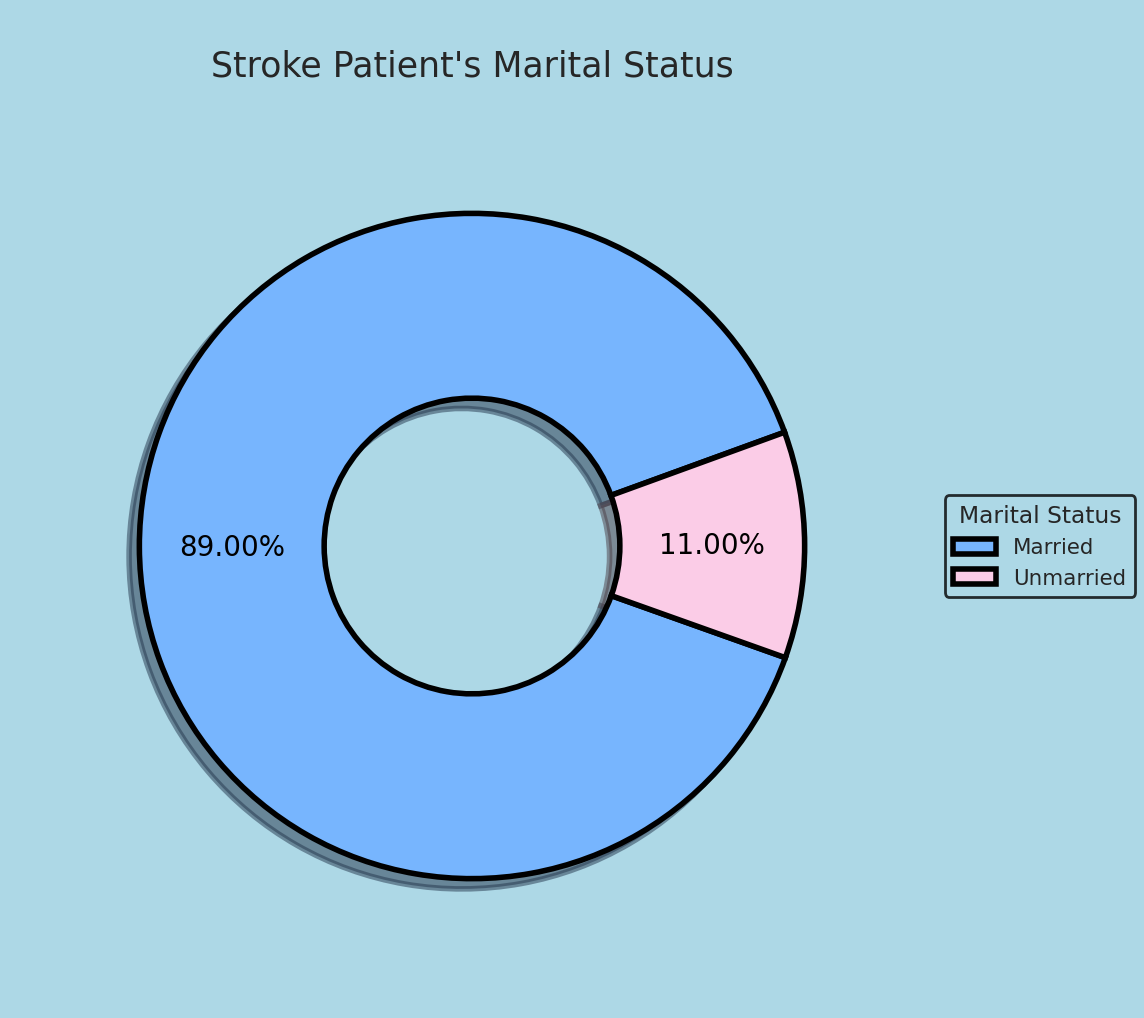

In [61]:
print(f"Let's have a look on the ratio of stroke patient's marital status :")
plt.subplots(figsize=(12, 12))

labels = "Married","Unmarried"
size = 0.5

wedges, texts, autotexts = plt.pie([data[data["Stroke"] == "Yes"]["Marital Status"].value_counts(ascending=False).values[0],
                                    data[data["Stroke"] == "Yes"]["Marital Status"].value_counts(ascending=False).values[1]],
                                    explode = (0,0),
                                    textprops=dict(size= 20, color= "black"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = palette[0:2], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 20)

plt.legend(wedges, labels, title="Marital Status",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Marital Status",fontsize=25)
plt.show()

Let's have a look on the stroke patient's marital status :


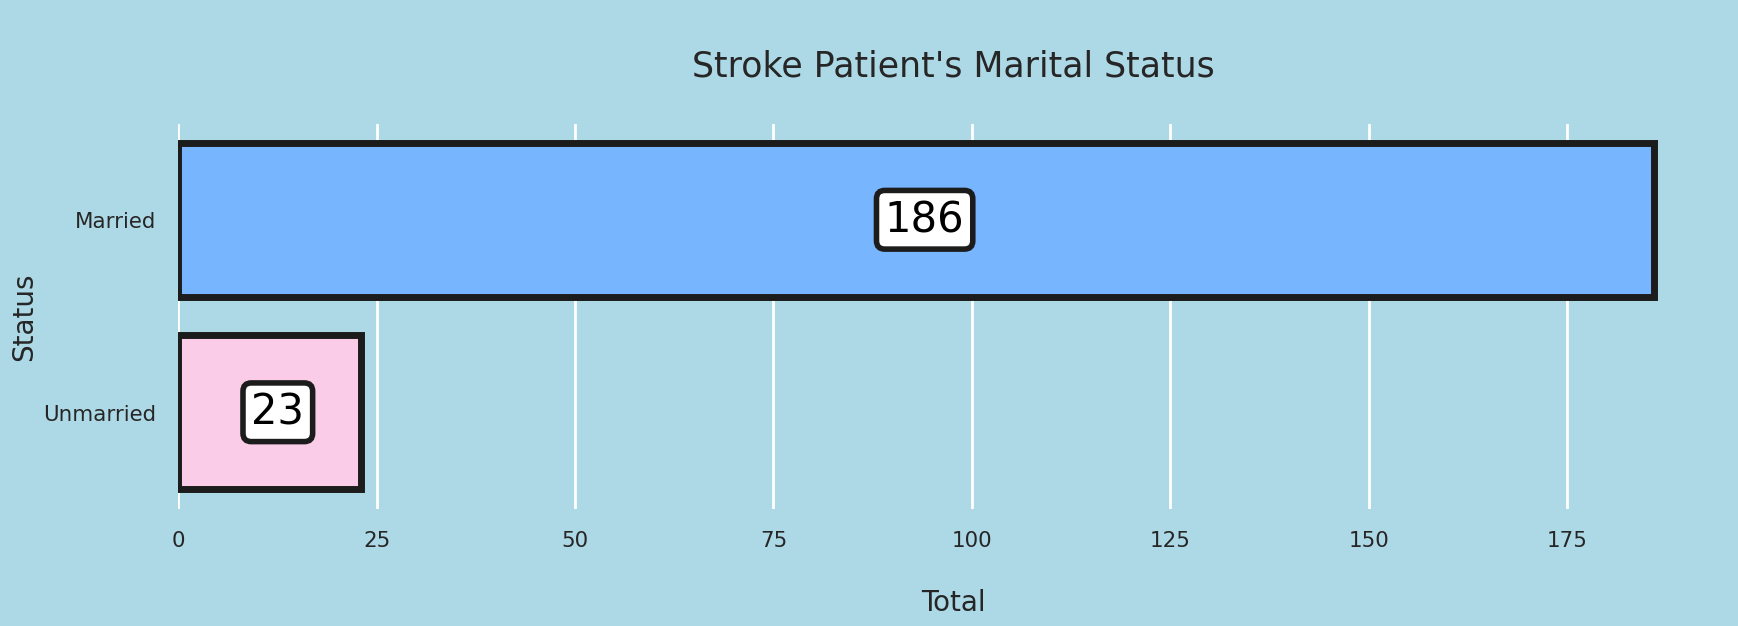

In [63]:
print("Let's have a look on the stroke patient's marital status :")
plt.subplots(figsize=(20, 5))
p=sns.countplot(y=data[data["Stroke"]=="Yes"]["Marital Status"],order=data[data["Stroke"]=="Yes"]["Marital Status"].value_counts(ascending=False).index,palette=palette[0:2], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nStroke Patient's Marital Status\n",fontsize=25)
p.axes.set_ylabel("Status",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the stroke patients are **Married** with a ratio of **89.00%** followed by **Unmarried** with a ratio of **11.00%**

<a id="11"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's BMI</p>

Let's have a look on the distribution of stroke patient's BMI :


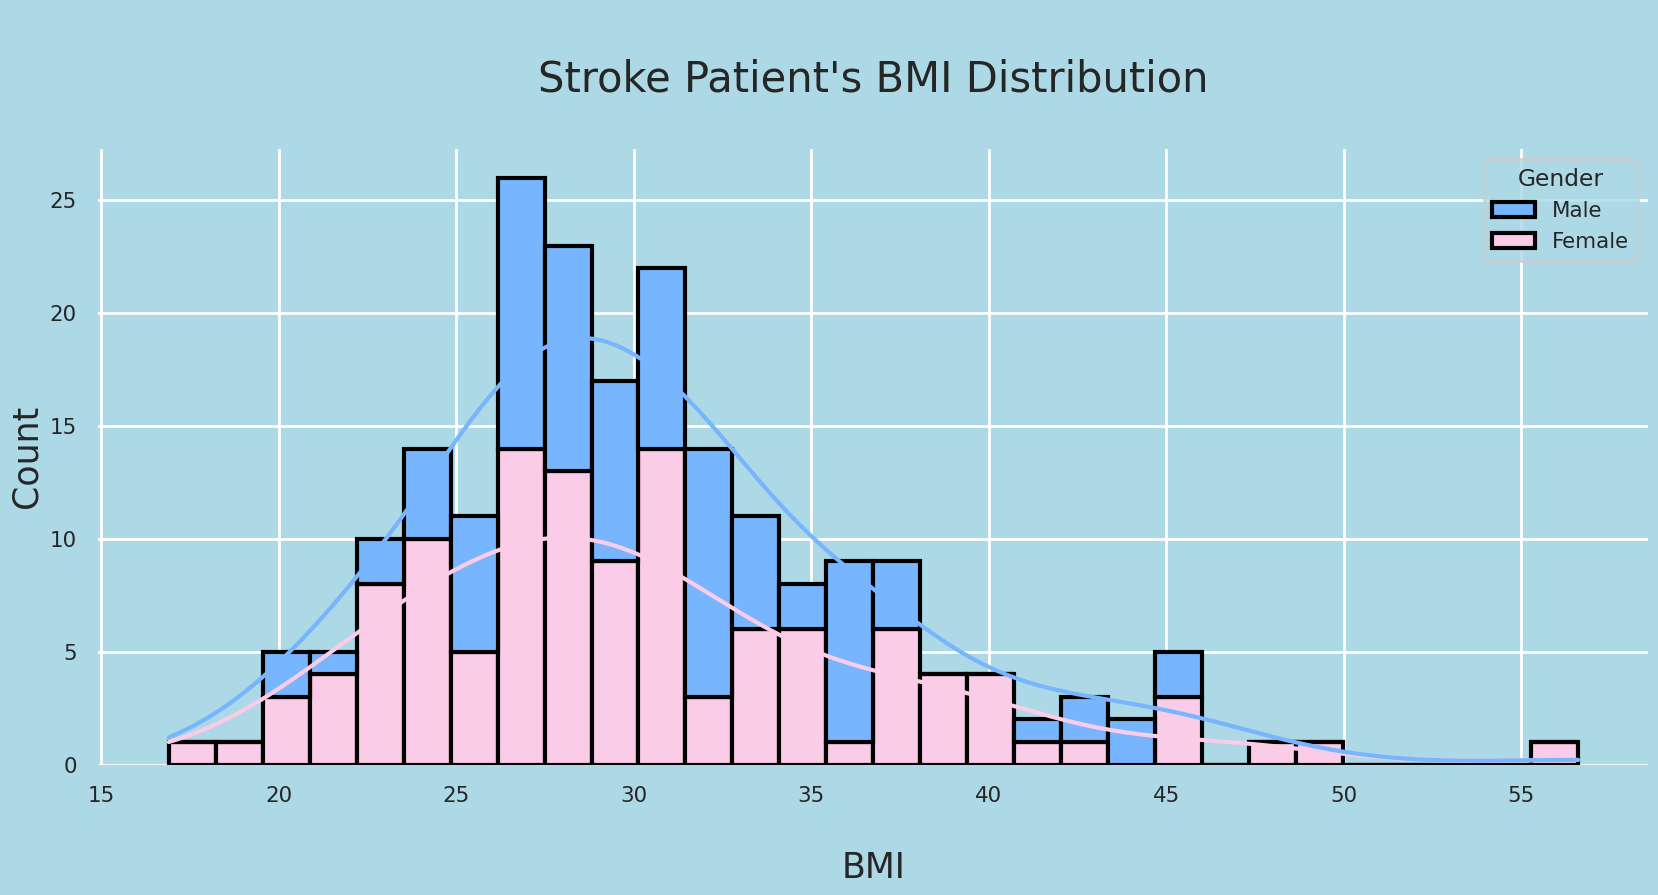

In [64]:
print(f"Let's have a look on the distribution of stroke patient's BMI :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=data[data["Stroke"] == "Yes"],x="BMI",hue="Gender",multiple="stack",palette=palette[0:2],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color(palette[1])
p.axes.lines[1].set_color(palette[0])
p.axes.set_title("\nStroke Patient's BMI Distribution\n",fontsize=30)
p.set_ylabel("Count",fontsize=25)
p.set_xlabel("\nBMI",fontsize=25)
p.set_yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

**Insights:**

* We can see the stroke patient's BMI distribution is right skewed. Most of the patient's BMI  fall in between **25** to **35**.
* Also there are some high BMI values too.

Let's have a look on the distribution of genderwise stroke patient's BMI :


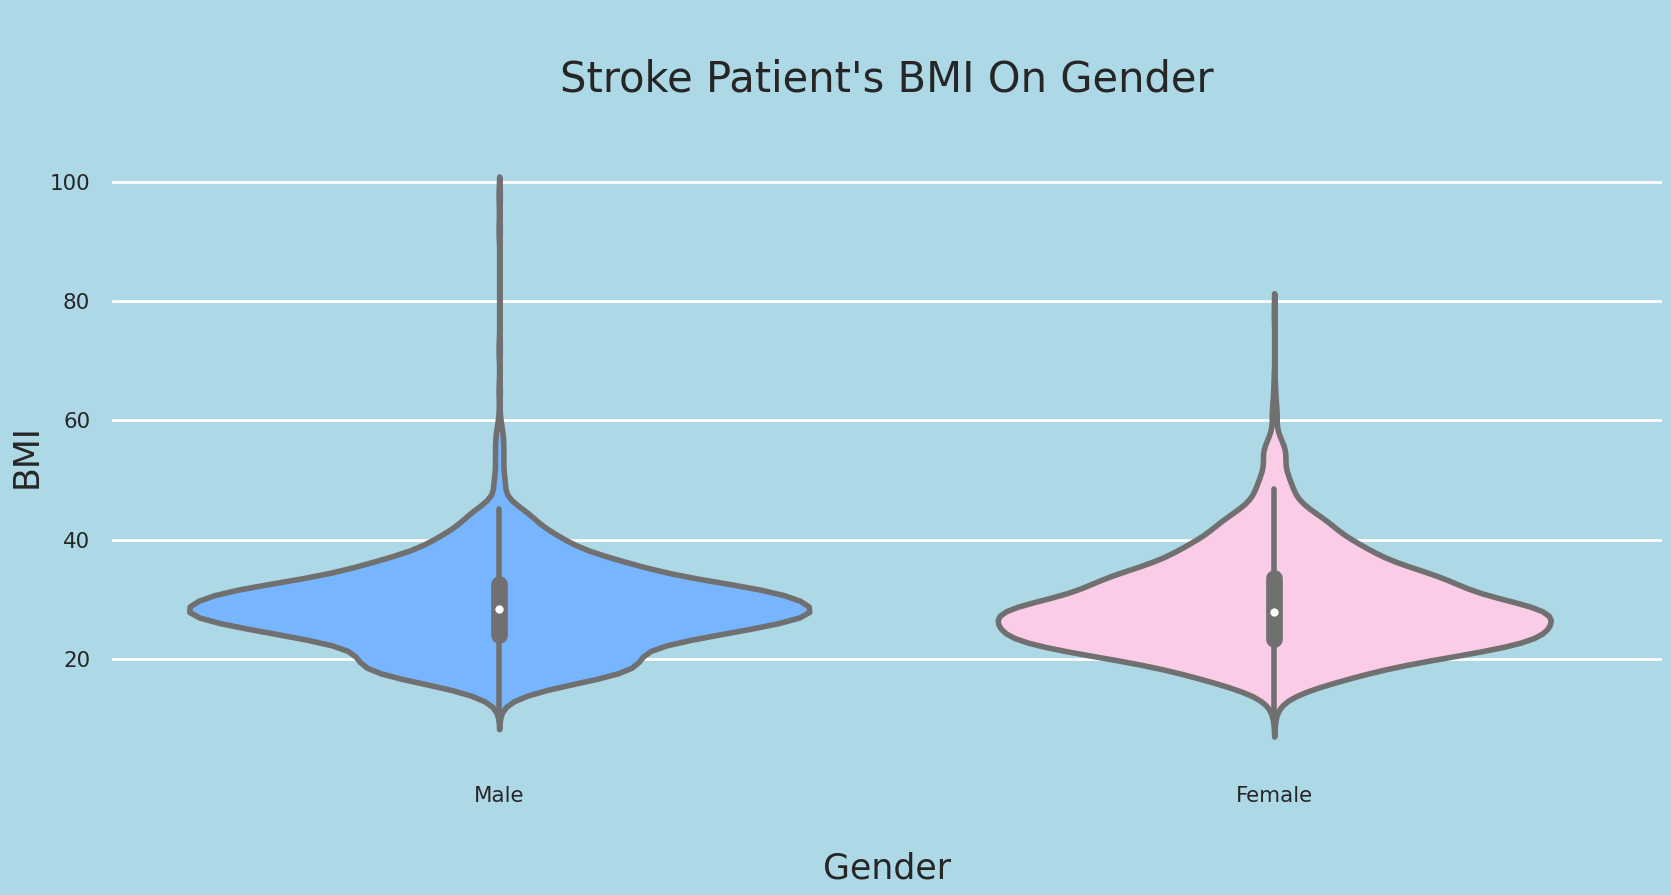

In [65]:
print("Let's have a look on the distribution of genderwise stroke patient's BMI :")
plt.subplots(figsize=(20, 8))

p=sns.violinplot(data=data[data["Stroke"] == "Yes"],x=data["Gender"],y=data["BMI"],order=data["Gender"].value_counts(ascending=True).index,palette=palette[0:2],saturation=1,linewidth=4,edgecolor="black")
p.axes.set_title("\nStroke Patient's BMI On Gender\n",fontsize=30)
p.axes.set_xlabel("\nGender",fontsize=25)
p.axes.set_ylabel("BMI",fontsize=25)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the **Male** patient's BMI fall in between **25** to **35**
* Most of the **Female** patient's BMI fall in between **23** to **31**

<a id="12"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's Heart Disease</p>

Let's have a look on the ratio of stroke patient's heart disease :


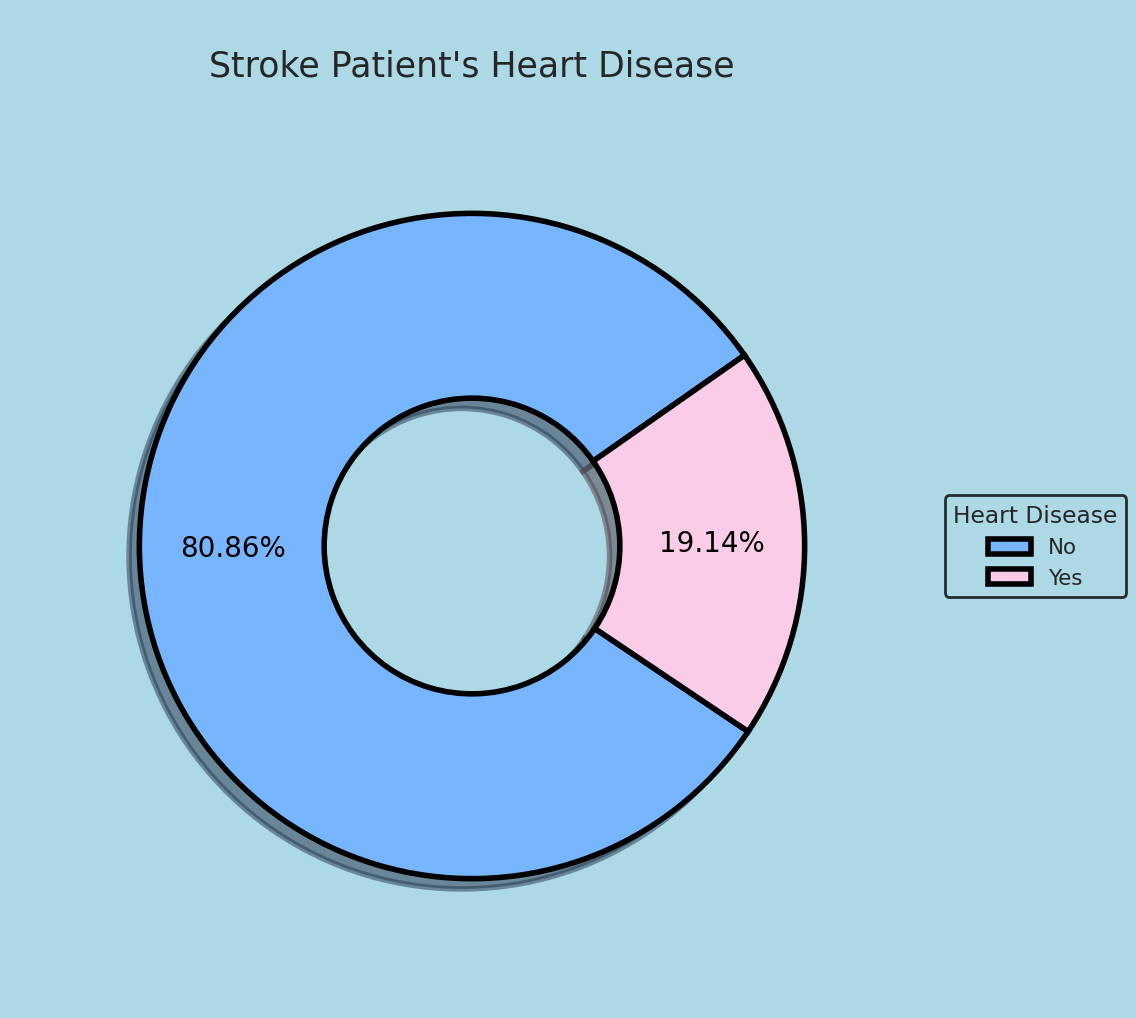

In [67]:
print(f"Let's have a look on the ratio of stroke patient's heart disease :")
plt.subplots(figsize=(12, 12))

labels = "No","Yes"
size = 0.5

wedges, texts, autotexts = plt.pie([data[data["Stroke"] == "Yes"]["Heart Disease"].value_counts(ascending=False).values[0],
                                    data[data["Stroke"] == "Yes"]["Heart Disease"].value_counts(ascending=False).values[1]],
                                    explode = (0,0),
                                    textprops=dict(size= 20, color= "black"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = palette[0:2], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 35)

plt.legend(wedges, labels, title="Heart Disease",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Heart Disease",fontsize=25)
plt.show()

Let's have a look on the stroke patient's heart disease :


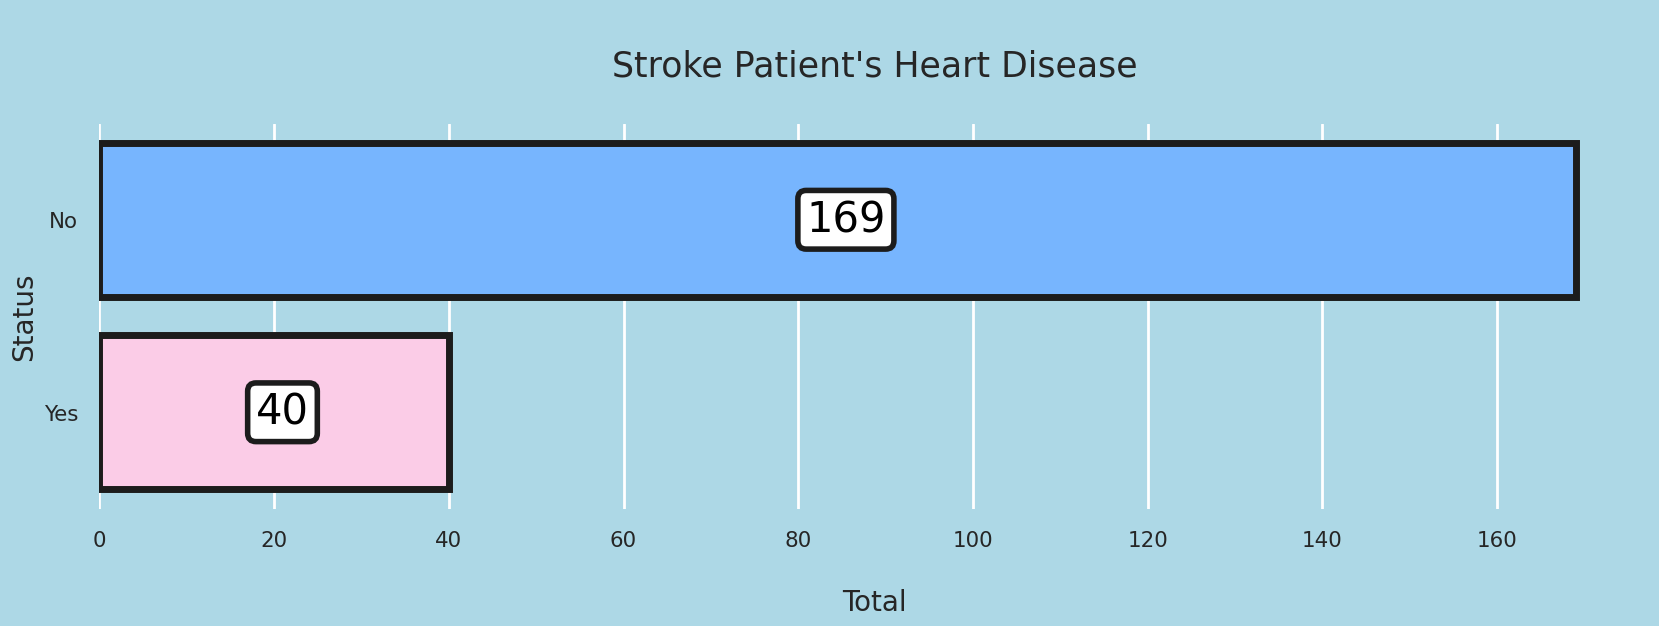

In [69]:
print("Let's have a look on the stroke patient's heart disease :")
plt.subplots(figsize=(20, 5))
p=sns.countplot(y=data[data["Stroke"]=="Yes"]["Heart Disease"],order=data[data["Stroke"]=="Yes"]["Heart Disease"].value_counts(ascending=False).index,palette=palette[0:2], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nStroke Patient's Heart Disease\n",fontsize=25)
p.axes.set_ylabel("Status",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the stroke patients do not have heart disease. Only **19.14%** patients have heart disease

<a id="13"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's Hypertension Status</p>

Let's have a look on the ratio of stroke patient's heart disease :


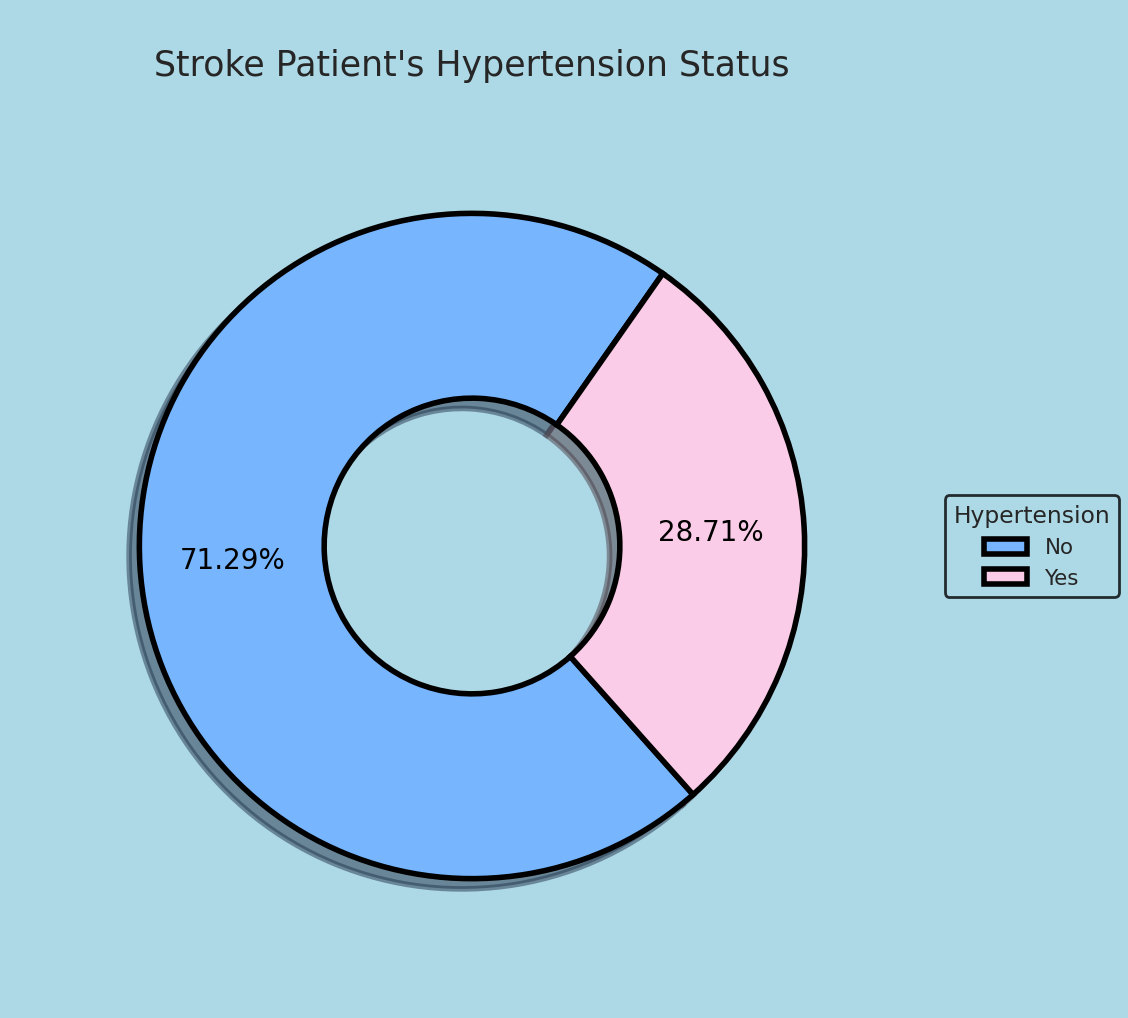

In [71]:
print(f"Let's have a look on the ratio of stroke patient's heart disease :")
plt.subplots(figsize=(12, 12))

labels = "No","Yes"
size = 0.5

wedges, texts, autotexts = plt.pie([data[data["Stroke"] == "Yes"]["Hypertension"].value_counts(ascending=False).values[0],
                                    data[data["Stroke"] == "Yes"]["Hypertension"].value_counts(ascending=False).values[1]],
                                    explode = (0,0),
                                    textprops=dict(size= 20, color= "black"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = palette[0:2], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 55)

plt.legend(wedges, labels, title="Hypertension",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Hypertension Status",fontsize=25)
plt.show()

Let's have a look on the stroke patient's hypertension status :


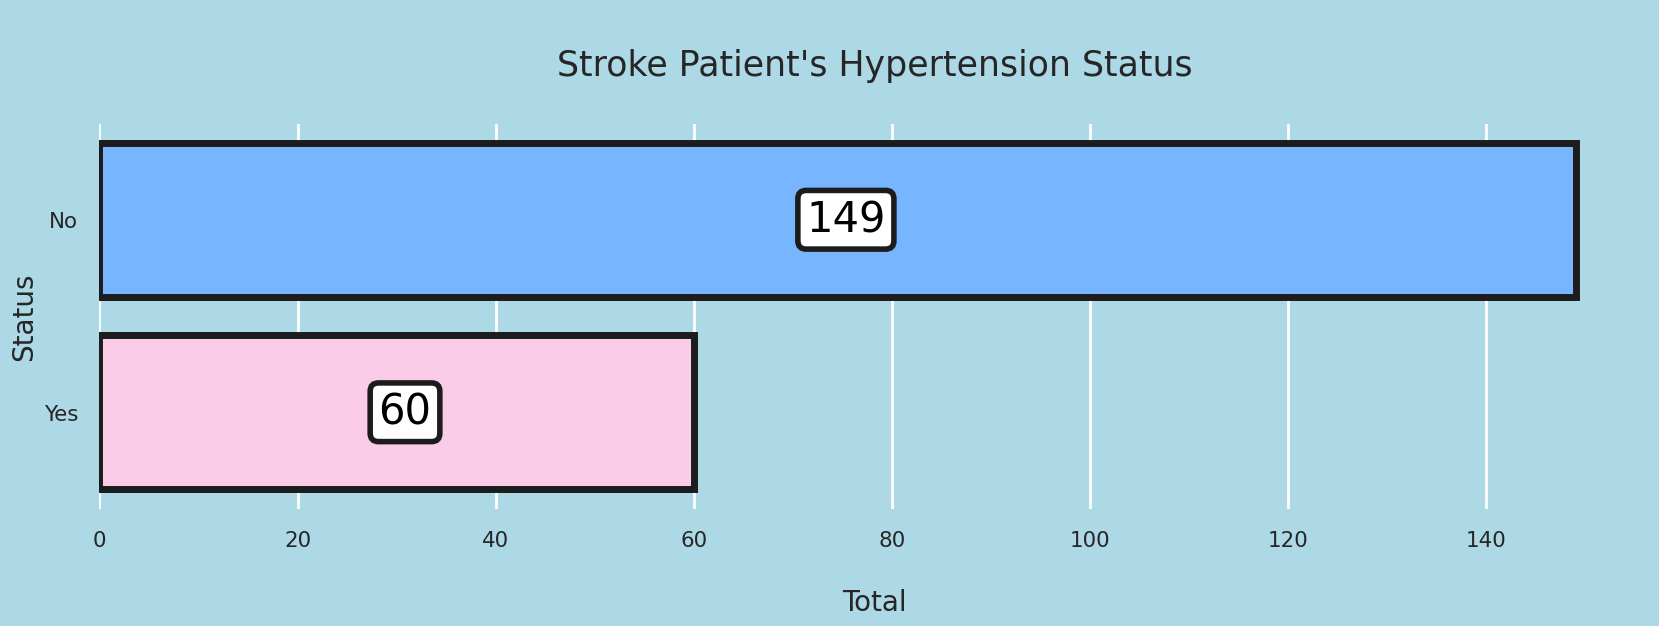

In [73]:
print("Let's have a look on the stroke patient's hypertension status :")
plt.subplots(figsize=(20, 5))
p=sns.countplot(y=data[data["Stroke"]=="Yes"]["Hypertension"],order=data[data["Stroke"]=="Yes"]["Hypertension"].value_counts(ascending=False).index,palette=palette[0:2], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nStroke Patient's Hypertension Status\n",fontsize=25)
p.axes.set_ylabel("Status",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the stroke patients do not have hypertension. Only **28.71%** patients have hypertension

<a id="14"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's Average Glucose Level</p>

Let's have a look on the distribution of stroke patient's average glucose level :


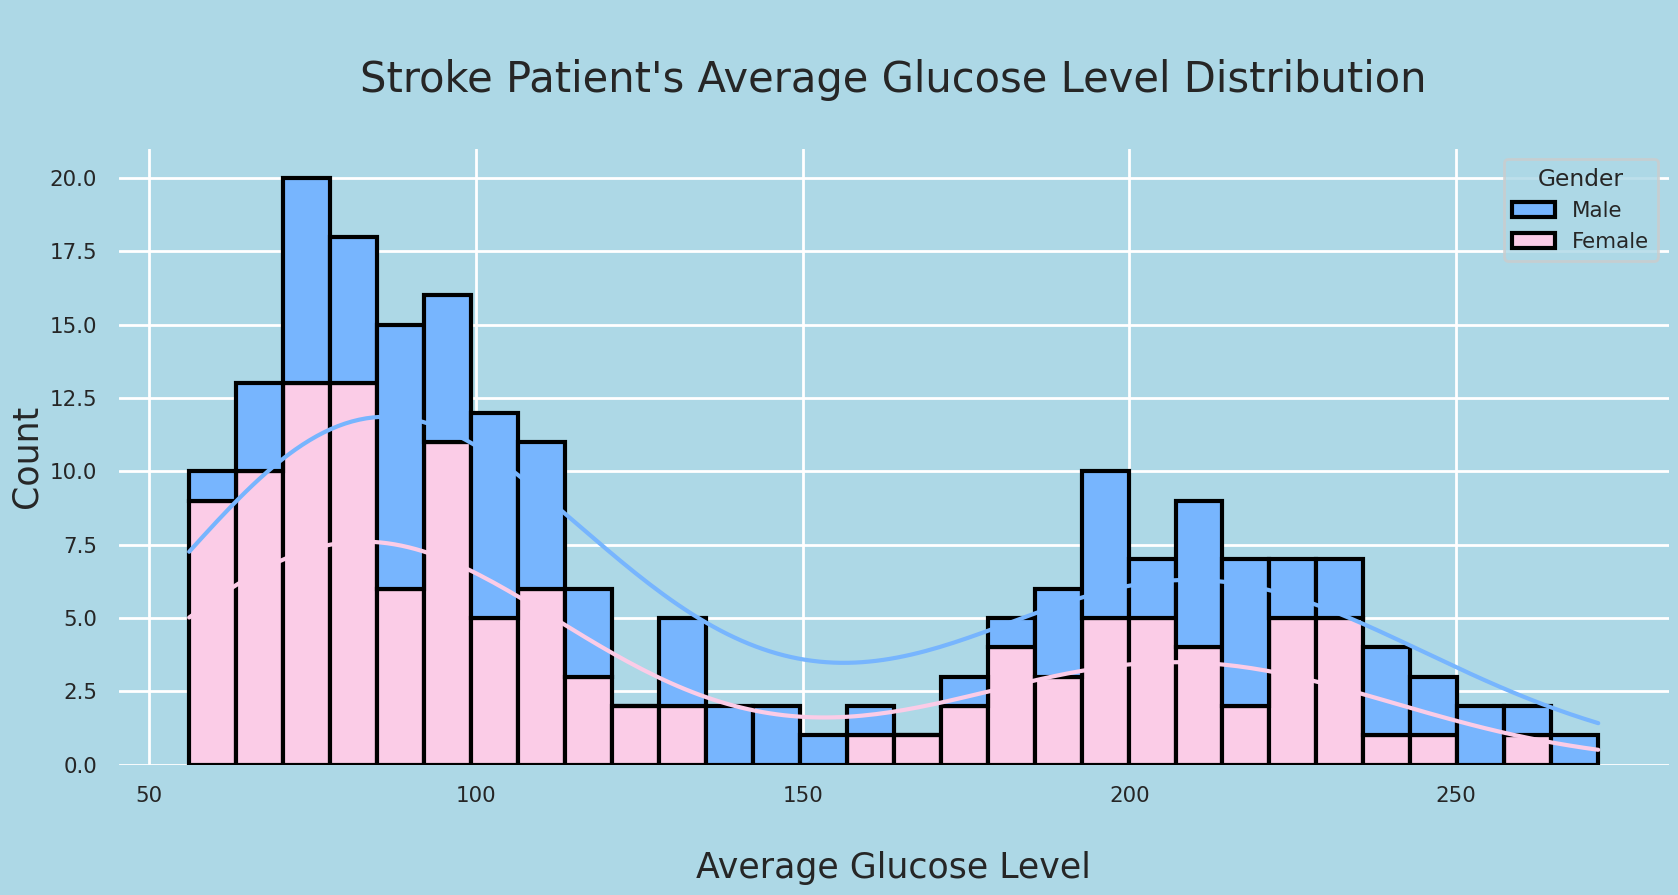

In [74]:
print(f"Let's have a look on the distribution of stroke patient's average glucose level :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=data[data["Stroke"]=="Yes"],x="Average Glucose Level",hue="Gender",multiple="stack",palette=palette[0:2],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color(palette[1])
p.axes.lines[1].set_color(palette[0])
p.axes.set_title("\nStroke Patient's Average Glucose Level Distribution\n",fontsize=30)
p.set_ylabel("Count",fontsize=25)
p.set_xlabel("\nAverage Glucose Level",fontsize=25)
p.set_yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

**Insights:**

* We can see most of the patient's average glucose levels fall in between **60** to **120**
* Also there are some high average glucose levels too

Let's have a look on the distribution of genderwise stroke patient's Average Glucose Level :


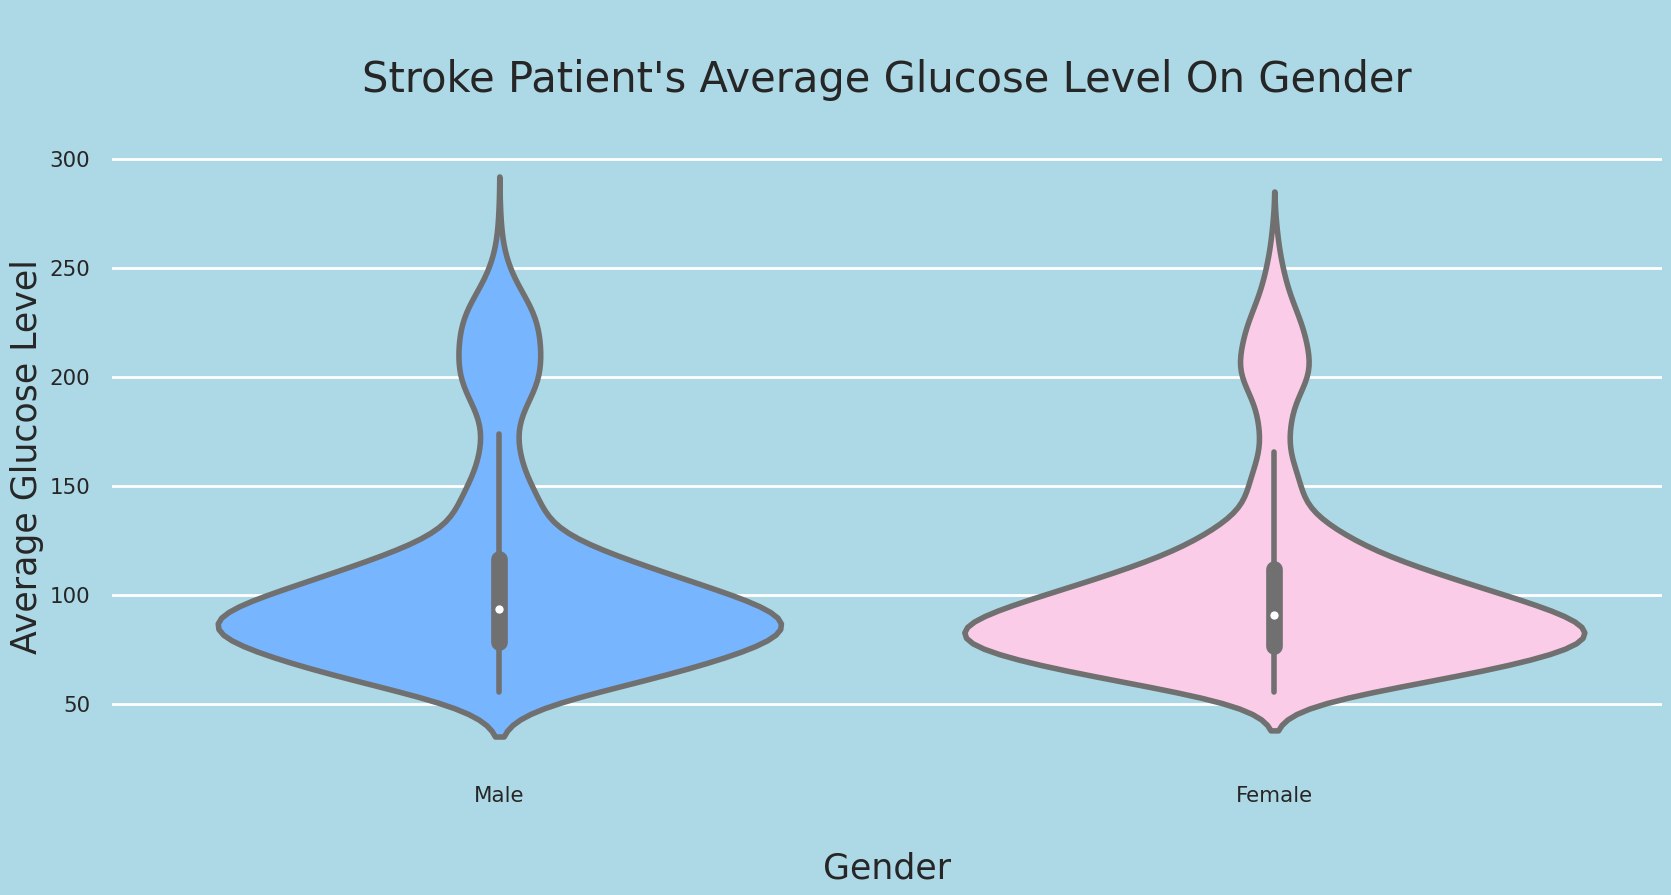

In [75]:
print("Let's have a look on the distribution of genderwise stroke patient's Average Glucose Level :")
plt.subplots(figsize=(20, 8))

p=sns.violinplot(data=data[data["Stroke"]=="Yes"],x=data["Gender"],y=data["Average Glucose Level"],order=data["Gender"].value_counts(ascending=True).index,palette=palette[0:2],saturation=1,linewidth=4,edgecolor="black")
p.axes.set_title("\nStroke Patient's Average Glucose Level On Gender\n",fontsize=30)
p.axes.set_xlabel("\nGender",fontsize=25)
p.axes.set_ylabel("Average Glucose Level",fontsize=25)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the **Male** patient's average glucose levels fall in between **70** to **120**
* Most of the **Female** patient's average glucose levels fall in between **55** to **115**

<a id="15"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's Occupation</p>

Let's have a look on the ratio of stroke patient's occupation type :


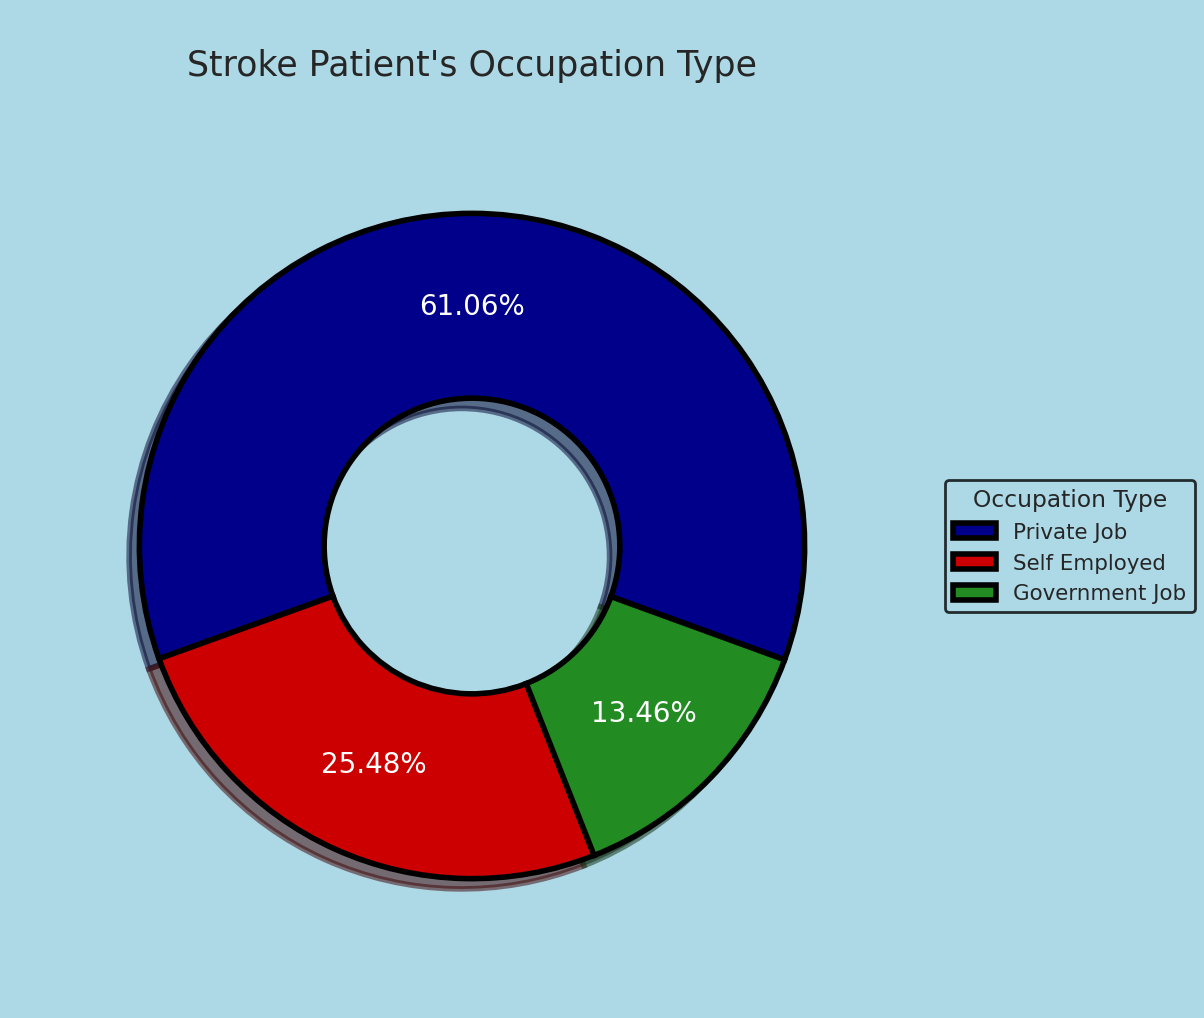

In [77]:
print(f"Let's have a look on the ratio of stroke patient's occupation type :")
plt.subplots(figsize=(12, 12))

labels = "Private Job","Self Employed","Government Job"
size = 0.5

wedges, texts, autotexts = plt.pie([data[data["Stroke"] == "Yes"]["Occupation Type"].value_counts(ascending=False).values[0],
                                    data[data["Stroke"] == "Yes"]["Occupation Type"].value_counts(ascending=False).values[1],
                                    data[data["Stroke"] == "Yes"]["Occupation Type"].value_counts(ascending=False).values[2]],
                                    explode = (0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = palette1[0:3], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = -20)

plt.legend(wedges, labels, title="Occupation Type",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Occupation Type",fontsize=25)
plt.show()

Let's have a look on the stroke patient's occupation type :


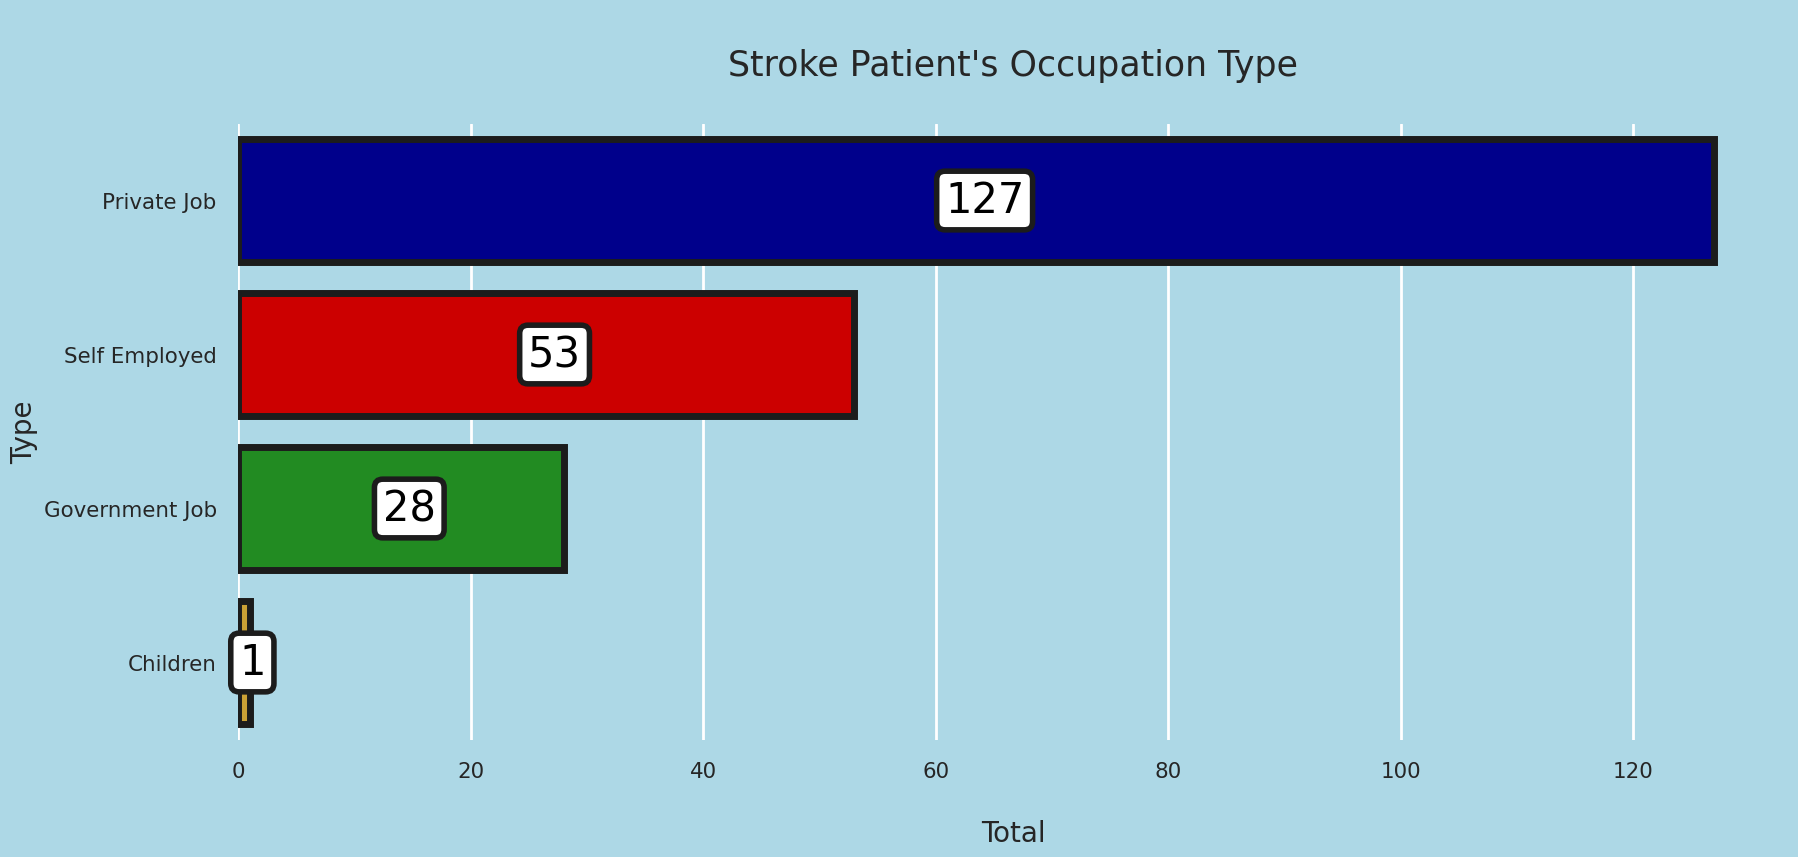

In [79]:
print("Let's have a look on the stroke patient's occupation type :")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=data[data["Stroke"]=="Yes"]["Occupation Type"],order=data[data["Stroke"]=="Yes"]["Occupation Type"].value_counts(ascending=False).index,palette=palette1[0:4], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nStroke Patient's Occupation Type\n",fontsize=25)
p.axes.set_ylabel("Type",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the stroke patients have experience of **Private Job** with a ratio of **61.06%**
* Some of the stroke patients have experience of **Self Employment** with a ratio of **25.48%**
* Some of the stroke patients have experience of **Government Job** with a ratio of **13.46%**
* Only 1 patient is children that's why it was not included in the donut chart

<a id="16"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's Residence</p>

Let's have a look on the ratio of stroke patient's residence type :


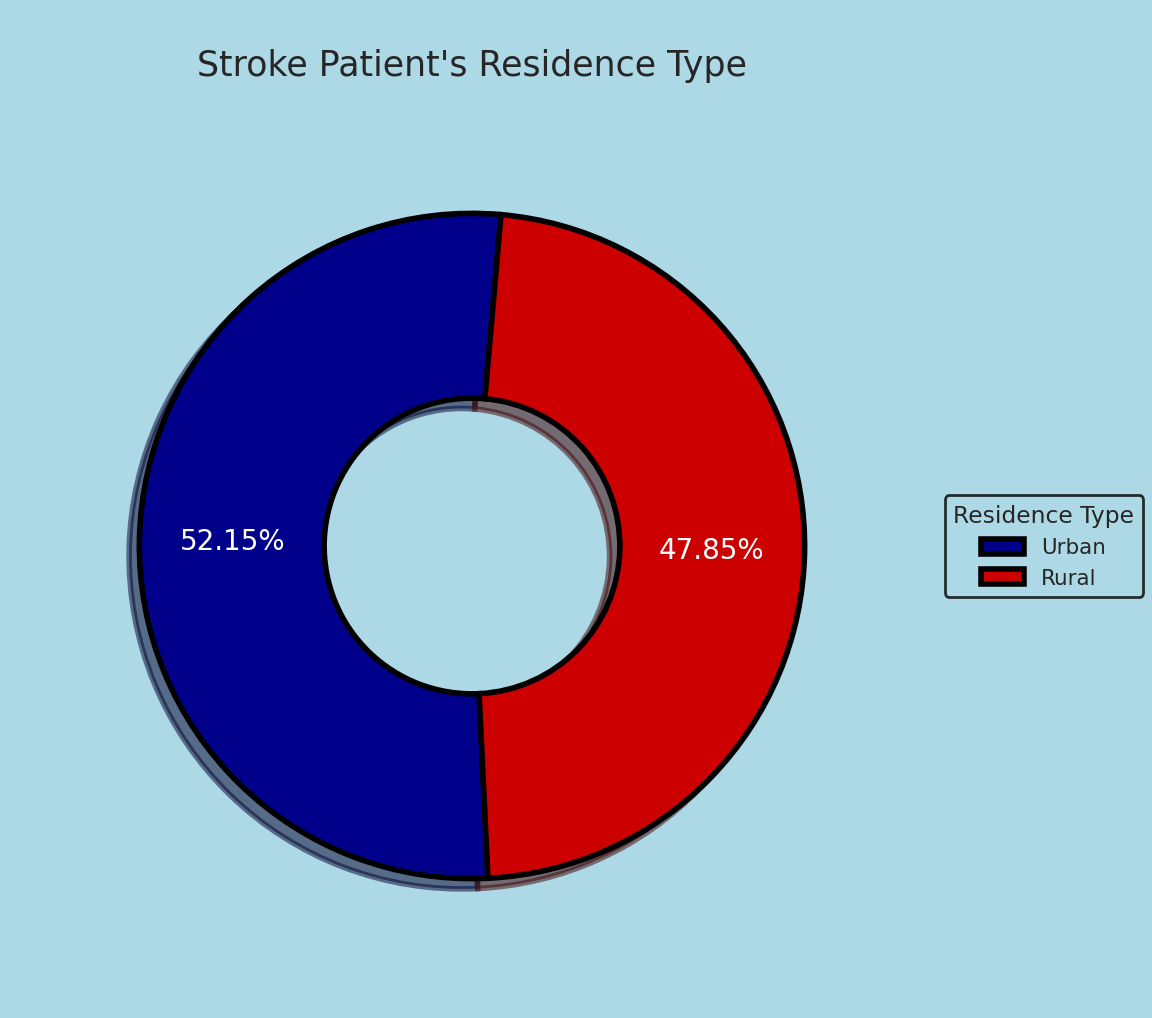

In [81]:
print(f"Let's have a look on the ratio of stroke patient's residence type :")
plt.subplots(figsize=(12, 12))

labels = "Urban","Rural"
size = 0.5

wedges, texts, autotexts = plt.pie([data[data["Stroke"] == "Yes"]["Residence Type"].value_counts(ascending=False).values[0],
                                    data[data["Stroke"] == "Yes"]["Residence Type"].value_counts(ascending=False).values[1]],
                                    explode = (0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = palette1[0:2], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 85)

plt.legend(wedges, labels, title="Residence Type",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Residence Type",fontsize=25)
plt.show()

Let's have a look on the stroke patient's residence type :


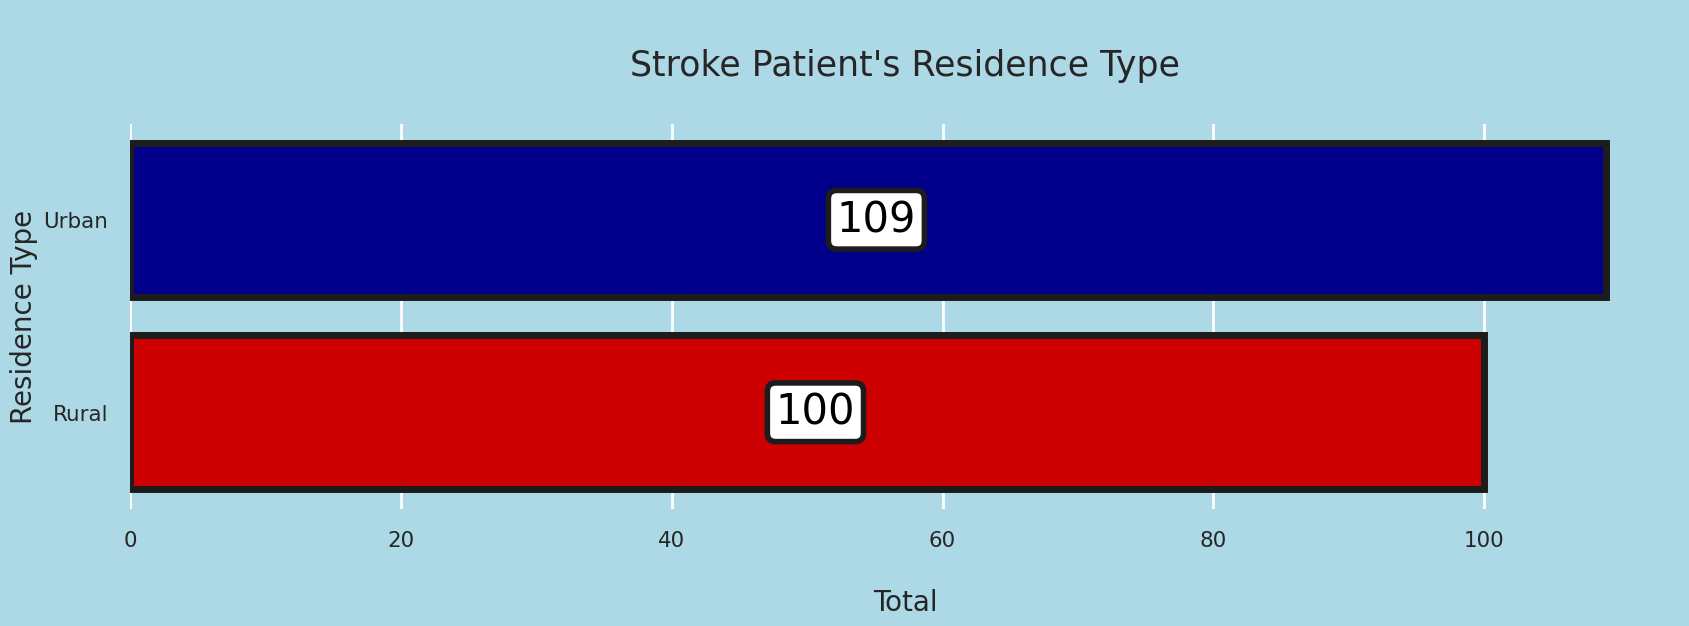

In [83]:
print("Let's have a look on the stroke patient's residence type :")
plt.subplots(figsize=(20, 5))
p=sns.countplot(y=data[data["Stroke"]=="Yes"]["Residence Type"],order=data[data["Stroke"]=="Yes"]["Residence Type"].value_counts(ascending=False).index,palette=palette1[0:2], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nStroke Patient's Residence Type\n",fontsize=25)
p.axes.set_ylabel("Residence Type",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* **52.15%** patients live in **Urban** area and **47.85%** patients live in **Rural** area

<a id="17"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Correlation Map</p>

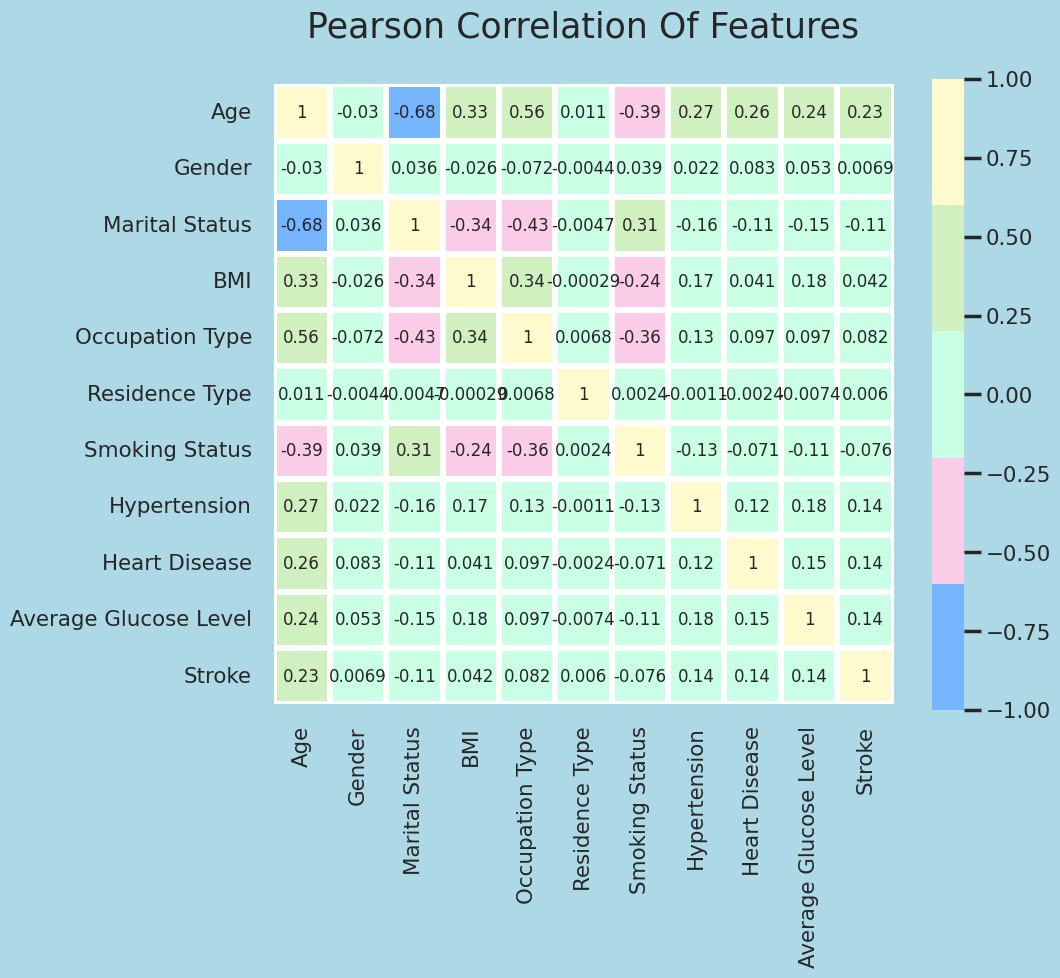

In [86]:
catcol = [col for col in data.columns if data[col].dtype == "object"]
le = LabelEncoder()
for col in catcol:
        data[col] = le.fit_transform(data[col])


plt.subplots(figsize =(10, 10))

sns.heatmap(data.corr(), cmap = palette_cmap, square=True, cbar_kws=dict(shrink =.82), 
            annot=True, vmin=-1, vmax=1, linewidths=3,linecolor='white',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

**Insights:**

* We can see there is not any high correlation between target feature and other features. Small positive correlation between target feature and **Age**, **Hypertension**, **Heart Disease**, **Average Glucose Level**. 
* Small positive correlation between **Age** and **Stroke**, **Hypertension**, **Heart Disease**, **Average Glucose Level**, **BMI**.
* Small positive correlation between **Smoking Status** and **Marital Status**, **Occupation Type** and **BMI**.
* Medium positive correlation between **Age** and **Occupation Type**.
* Medium negative correlation between **Age** and **Marital Status**.

<a id="18"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model Creation & Performance Evaluation</p>

After performing standardization, we have splitted the dataset with a ratio of 0.2 that means 80% data for training and 20% data for validation process.

In [87]:
x = data.drop(["Stroke"],axis =1)
y = data["Stroke"]

sc = StandardScaler()
x = sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (3926, 10), (3926,)
Shape of testing data : (982, 10), (982,)


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#432C0A;font-size:200%;font-weight: 500;color:#c69c6c;overflow:hidden;">ㅤLogistic Regressionㅤ</span>

In [90]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_conf = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{lr_conf}")
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")

Confusion Matrix : 

[[929   0]
 [ 53   0]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982


The Accuracy of Logistic Regression is 94.6 %


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#432C0A;font-size:200%;font-weight: 500;color:#c69c6c;overflow:hidden;">ㅤGaussian Naive Bayesㅤ</span>

In [93]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
gnb_conf = confusion_matrix(y_test, gnb_pred)
gnb_report = classification_report(y_test, gnb_pred)
gnb_acc = round(accuracy_score(y_test, gnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian Naive Bayes is {gnb_acc} %")

Confusion Matrix : 

[[822 107]
 [ 30  23]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       929
           1       0.18      0.43      0.25        53

    accuracy                           0.86       982
   macro avg       0.57      0.66      0.59       982
weighted avg       0.92      0.86      0.89       982


The Accuracy of Gaussian Naive Bayes is 86.05 %


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#432C0A;font-size:200%;font-weight: 500;color:#c69c6c;overflow:hidden;">ㅤBernoulli Naive Bayesㅤ</span>

In [94]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
bnb_pred = bnb.predict(x_test)
bnb_conf = confusion_matrix(y_test, bnb_pred)
bnb_report = classification_report(y_test, bnb_pred)
bnb_acc = round(accuracy_score(y_test, bnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{bnb_conf}")
print(f"\nClassification Report : \n\n{bnb_report}")
print(f"\nThe Accuracy of Bernoulli Naive Bayes is {bnb_acc} %")

Confusion Matrix : 

[[917  12]
 [ 51   2]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       929
           1       0.14      0.04      0.06        53

    accuracy                           0.94       982
   macro avg       0.55      0.51      0.51       982
weighted avg       0.90      0.94      0.92       982


The Accuracy of Bernoulli Naive Bayes is 93.58 %


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#432C0A;font-size:200%;font-weight: 500;color:#c69c6c;overflow:hidden;">ㅤSupport Vector Machineㅤ</span>

In [95]:
svm = SVC(C = 100, gamma = 0.002)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_acc = round(accuracy_score(y_test, svm_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{svm_conf}")
print(f"\nClassification Report : \n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")

Confusion Matrix : 

[[929   0]
 [ 53   0]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982


The Accuracy of Support Vector Machine is 94.6 %


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#432C0A;font-size:200%;font-weight: 500;color:#c69c6c;overflow:hidden;">ㅤRandom Forestㅤ</span>

In [96]:
rfg = RandomForestClassifier(n_estimators = 100, random_state = 42) 
rfg.fit(x_train, y_train)
rfg_pred = rfg.predict(x_test)
rfg_conf = confusion_matrix(y_test, rfg_pred)
rfg_report = classification_report(y_test, rfg_pred)
rfg_acc = round(accuracy_score(y_test, rfg_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{rfg_conf}")
print(f"\nClassification Report : \n\n{rfg_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfg_acc} %")

Confusion Matrix : 

[[929   0]
 [ 53   0]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982


The Accuracy of Random Forest Classifier is 94.6 %


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#432C0A;font-size:200%;font-weight: 500;color:#c69c6c;overflow:hidden;">ㅤK Nearest Neighborsㅤ</span>

In [97]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_conf = confusion_matrix(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)
knn_acc = round(accuracy_score(y_test, knn_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{knn_conf}")
print(f"\nClassification Report : \n\n{knn_report}")
print(f"\nThe Accuracy of K Nearest Neighbors Classifier is {knn_acc} %")

Confusion Matrix : 

[[928   1]
 [ 53   0]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982


The Accuracy of K Nearest Neighbors Classifier is 94.5 %


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#432C0A;font-size:200%;font-weight: 500;color:#c69c6c;overflow:hidden;">ㅤExtreme Gradient Boostingㅤ</span>

In [98]:
xgb = XGBClassifier(use_label_encoder = False)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
xgb_conf = confusion_matrix(y_test, xgb_pred)
xgb_report = classification_report(y_test, xgb_pred)
xgb_acc = round(accuracy_score(y_test, xgb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{xgb_conf}")
print(f"\nClassification Report : \n\n{xgb_report}")
print(f"\nThe Accuracy of Extreme Gradient Boosting Classifier is {xgb_acc} %")

Confusion Matrix : 

[[920   9]
 [ 52   1]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       929
           1       0.10      0.02      0.03        53

    accuracy                           0.94       982
   macro avg       0.52      0.50      0.50       982
weighted avg       0.90      0.94      0.92       982


The Accuracy of Extreme Gradient Boosting Classifier is 93.79 %
